<a href="https://colab.research.google.com/github/sgevatschnaider/GraphAI-Data-Science-ML/blob/main/notebooks/%20Clase_2_Sharding_y_el_Teorema_CAP_en_Sistemas_Distribuidos_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import display, HTML

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Clase 2 Sharding - Teorema CAP - Cassandra</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: #f9f9f9;
      color: #333;
      transition: background-color 0.3s, color 0.3s;
      padding: 20px;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1 {
      color: #2c3e50;
      text-align: center;
      font-size: 2.5em;
      margin-bottom: 20px;
    }
    body.dark-mode h1 {
      color: #ecf0f1;
    }
    h2 {
      color: #2980b9;
      font-size: 1.8em;
      margin-top: 30px;
    }
    body.dark-mode h2 {
      color: #9ad3de;
    }
    h3 {
      margin-top: 25px;
      font-size: 1.5em;
    }
    p {
      font-size: 1.2em;
      margin-bottom: 15px;
    }
    ul {
      list-style-type: square;
      margin-left: 30px;
      margin-bottom: 20px;
    }
    ul ul {
      list-style-type: disc;
      margin-left: 50px;
    }
    li {
      margin-bottom: 10px;
      font-size: 1.1em;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 20px;
      transition: background-color 0.3s;
      display: block;
      margin-left: auto;
      margin-right: auto;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <h1>Material Elaborado por Sergio Gevatschnaider</h1>
    <h2>Clase 2: Sharding y el Teorema CAP en Sistemas Distribuidos</h2>

    <h3>1. Introducción a los temas tratados en el documento</h3>
    <p>
      Este documento aborda conceptos clave sobre <span class="keyword">sistemas distribuidos</span>, centrándose en las estrategias de <span class="keyword">sharding</span>, el <span class="keyword">teorema CAP</span> y la base de datos distribuida <span class="keyword">Cassandra</span>. Se explican los desafíos de la distribución de datos, la consistencia y la disponibilidad en bases de datos escalables, y cómo tecnologías modernas como MongoDB, Redis y Cassandra implementan estos conceptos.
    </p>
    <p>
      Los temas se presentan combinando teoría y ejemplos prácticos, incluyendo código en Python y visualizaciones para demostrar la asignación de datos en diferentes estrategias de particionamiento.
    </p>

    <h3>2. Objetivo educativo del documento</h3>
    <p>
      El propósito de este material es proporcionar una comprensión profunda sobre:
    </p>
    <ul>
      <li>Sharding en bases de datos distribuidas, su importancia y su impacto en la escalabilidad y eficiencia.</li>
      <li>El Teorema CAP, que describe los compromisos entre <span class="keyword">consistencia</span>, <span class="keyword">disponibilidad</span> y <span class="keyword">tolerancia a particiones</span>.</li>
      <li>Cassandra, como un caso de estudio de bases de datos diseñadas para sistemas distribuidos a gran escala.</li>
      <li>Implementaciones prácticas de estas técnicas a través de código y visualizaciones en Python.</li>
    </ul>
    <p>
      Al finalizar el documento, el lector debería ser capaz de:
    </p>
    <ul>
      <li>Comprender cómo funciona el sharding y sus variantes (hashing tradicional vs. hashing consistente).</li>
      <li>Explicar el Teorema CAP y cómo se aplica en bases de datos distribuidas.</li>
      <li>Analizar cómo Cassandra maneja la escalabilidad y la tolerancia a fallos.</li>
      <li>Implementar ejemplos básicos de sharding usando Python.</li>
    </ul>

    <h3>3. Índice </h3>
    <ul>
      <li>
        <strong>Introducción a Sharding</strong>
        <ul>
          <li>Definición y propósito</li>
          <li>Diferencias entre Shard Físico y Shard Lógico</li>
          <li>Problemas del hashing tradicional en sharding</li>
          <li>Hashing Consistente como solución</li>
          <li>Visualización del Impacto del Sharding</li>
        </ul>
      </li>
      <li>
        <strong>Teorema CAP</strong>
        <ul>
          <li>Explicación del teorema</li>
          <li>Ejemplos en la vida real: Bancos, Redes Sociales, Bitcoin</li>
          <li>Relación entre ACID y CAP</li>
        </ul>
      </li>
      <li>
        <strong>Bases de Datos Distribuidas</strong>
        <ul>
          <li>MongoDB y Redis: cómo implementan el sharding</li>
          <li>Arquitectura de Google Spanner y su control de consistencia</li>
          <li>Introducción a Cassandra y su modelo de consistencia eventual</li>
        </ul>
      </li>
      <li>
        <strong>Cassandra y su Arquitectura</strong>
        <ul>
          <li>Modelo peer-to-peer y uso de Gossip Protocol</li>
          <li>Distribución de carga y tolerancia a fallos</li>
          <li>Implementación de sharding en Cassandra</li>
        </ul>
      </li>
      <li>
        <strong>Ejemplo Práctico con Python</strong>
        <ul>
          <li>Implementación de un sistema de sharding con hashing tradicional</li>
          <li>Comparación con hashing consistente</li>
          <li>Visualización de la distribución de datos en shards</li>
        </ul>
      </li>
      <li>
        <strong>Conclusión y Aplicaciones</strong>
        <ul>
          <li>Cómo elegir la mejor estrategia de sharding</li>
          <li>Ejemplos de uso en empresas tecnológicas</li>
          <li>Próximos pasos para profundizar en bases de datos distribuidas</li>
        </ul>
      </li>
    </ul>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Sharding: Físico vs. Lógico y Estrategias en Sistemas Reales</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    pre {
      background: #ecf0f1;
      padding: 10px;
      overflow: auto;
      border-radius: 4px;
      font-family: monospace;
      margin-bottom: 15px;
    }
    body.dark-mode pre {
      background: #34495e;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
    /* Estilos para secciones colapsables */
    details {
      border: 1px solid #ccc;
      border-radius: 4px;
      margin-bottom: 15px;
      padding: 10px;
    }
    summary {
      font-size: 1.2em;
      font-weight: bold;
      cursor: pointer;
      outline: none;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <!-- Sección 1: Shard Físico -->
    <details>
      <summary>1. Shard Físico</summary>
      <p>
        Un <span class="keyword">shard físico</span> es una instancia real de almacenamiento, es decir, un servidor o nodo donde se guardan datos.
      </p>
      <p><strong>Características:</strong></p>
      <ul>
        <li>Unidad de almacenamiento concreta (hardware o nube).</li>
        <li>Puede estar en un servidor local o distribuido en distintas máquinas.</li>
        <li>Cada shard físico puede alojar uno o varios shards lógicos.</li>
      </ul>
      <p><strong>Ejemplo:</strong></p>
      <pre>
Servidor 1 → Contiene usuarios A-M
Servidor 2 → Contiene usuarios N-Z
Servidor 3 → Contiene datos de órdenes
      </pre>
    </details>
    <hr>

    <!-- Sección 2: Shard Lógico -->
    <details>
      <summary>2. Shard Lógico</summary>
      <p>
        Un <span class="keyword">shard lógico</span> es una partición virtual de datos que se define a nivel de base de datos, sin estar ligada permanentemente a un servidor específico.
      </p>
      <p><strong>Características:</strong></p>
      <ul>
        <li>Definido en el nivel lógico del sistema.</li>
        <li>Puede moverse entre diferentes shards físicos sin afectar al usuario.</li>
        <li>Ayuda a balancear la carga sin preocuparse por la infraestructura subyacente.</li>
      </ul>
      <p><strong>Ejemplo:</strong></p>
      <pre>
Shard Lógico 1 → Usuarios de América
Shard Lógico 2 → Usuarios de Europa
Shard Lógico 3 → Usuarios de Asia
      </pre>
    </details>
    <hr>

    <!-- Sección 3: Diferencia Clave: Lógica vs. Infraestructura -->
    <details>
      <summary>3. Diferencia Clave: Lógica vs. Infraestructura</summary>
      <table>
        <thead>
          <tr>
            <th>Diferencia</th>
            <th>Shard Físico</th>
            <th>Shard Lógico</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Nivel</strong></td>
            <td>Infraestructura (servidores)</td>
            <td>Estructura lógica de la base de datos</td>
          </tr>
          <tr>
            <td><strong>Ubicación</strong></td>
            <td>Fijo en un servidor o nodo</td>
            <td>Puede moverse entre servidores</td>
          </tr>
          <tr>
            <td><strong>Escalabilidad</strong></td>
            <td>Limitada por hardware</td>
            <td>Flexible y dinámica</td>
          </tr>
          <tr>
            <td><strong>Ejemplo</strong></td>
            <td>Servidor en AWS o Google Cloud</td>
            <td>Tabla de usuarios particionada por región</td>
          </tr>
        </tbody>
      </table>
    </details>
    <hr>

    <!-- Sección 4: Ejemplos en Sistemas Reales -->
    <details>
      <summary>4. Ejemplos en Sistemas Reales</summary>
      <ul>
        <li>
          <strong>MongoDB:</strong>
          <ul>
            <li>Usa sharding lógico con <span class="keyword">shard keys</span> para distribuir los datos automáticamente.</li>
            <li>Los shards físicos son los servidores donde se alojan los datos.</li>
          </ul>
        </li>
        <li>
          <strong>MySQL Cluster:</strong>
          <ul>
            <li>Divide los datos entre nodos físicos (shards físicos).</li>
            <li>Permite reorganizar los datos dentro de esos nodos de forma lógica (sharding lógico).</li>
          </ul>
        </li>
        <li>
          <strong>PostgreSQL (Citus):</strong>
          <ul>
            <li>Usa sharding horizontal para distribuir datos en múltiples nodos físicos.</li>
            <li>Los shards lógicos permiten mover particiones de tablas a diferentes servidores.</li>
          </ul>
        </li>
      </ul>
    </details>
    <hr>

    <!-- Sección 5: Ventajas y Desafíos de Cada Enfoque -->
    <details>
      <summary>5. Ventajas y Desafíos de Cada Enfoque</summary>
      <table>
        <thead>
          <tr>
            <th>Aspecto</th>
            <th>Shard Físico</th>
            <th>Shard Lógico</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Ventaja</strong></td>
            <td>Alta capacidad de almacenamiento y rendimiento</td>
            <td>Flexibilidad para reorganizar datos</td>
          </tr>
          <tr>
            <td><strong>Desafío</strong></td>
            <td>Costoso de escalar físicamente</td>
            <td>Puede generar latencia si no se equilibra bien</td>
          </tr>
          <tr>
            <td><strong>Escalabilidad</strong></td>
            <td>Limitada por hardware</td>
            <td>Ilimitada, depende de la estructura lógica</td>
          </tr>
          <tr>
            <td><strong>Mantenimiento</strong></td>
            <td>Requiere gestión de infraestructura</td>
            <td>Puede automatizarse con herramientas de bases de datos</td>
          </tr>
        </tbody>
      </table>
    </details>
    <hr>

    <!-- Sección 6: Balanceo de Carga y Migración de Shards -->
    <details>
      <summary>6. Balanceo de Carga y Migración de Shards</summary>
      <p>Cuando un shard lógico crece demasiado, se pueden aplicar las siguientes estrategias:</p>
      <ul>
        <li><strong>División del Shard Lógico:</strong> Separarlo en shards más pequeños y distribuirlos.</li>
        <li><strong>Reasignación de Shards:</strong> Mover un shard lógico de un servidor a otro con mayor capacidad.</li>
        <li><strong>Replicación:</strong> Mantener copias de los shards para asegurar alta disponibilidad.</li>
      </ul>
      <p><strong>Ejemplo en MongoDB:</strong></p>
      <pre>
db.adminCommand( { moveChunk: "miDB.miColeccion", find: { _id: 5000 }, to: "shard002" } )
      </pre>
      <p>Este comando mueve un chunk (parte de un shard lógico) a otro shard físico.</p>
    </details>
    <hr>

    <!-- Sección 7: ¿Cómo se relacionan? -->
    <details>
      <summary>7. ¿Cómo se relacionan?</summary>
      <ul>
        <li>Un shard físico puede contener múltiples shards lógicos.</li>
        <li>Cuando se requiere mayor capacidad, un shard lógico puede moverse a otro shard físico.</li>
        <li>En sistemas como MongoDB o MySQL Cluster, se usa sharding lógico para distribuir datos de forma eficiente sin depender de servidores específicos.</li>
      </ul>
    </details>
    <hr>

    <!-- Sección 8: Conclusión -->
    <details>
      <summary>8. Conclusión</summary>
      <ul>
        <li><strong>Shard Físico:</strong> Representa la infraestructura real de almacenamiento.</li>
        <li><strong>Shard Lógico:</strong> Es la división virtual de los datos dentro de la base de datos.</li>
        <li>Ambos enfoques se complementan para optimizar la escalabilidad, el rendimiento y la gestión en sistemas distribuidos.</li>
      </ul>
    </details>

  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Diferencia,Shard Físico,Shard Lógico
Nivel,Infraestructura (servidores),Estructura lógica de la base de datos
Ubicación,Fijo en un servidor o nodo,Puede moverse entre servidores
Escalabilidad,Limitada por hardware,Flexible y dinámica
Ejemplo,Servidor en AWS o Google Cloud,Tabla de usuarios particionada por región
Aspecto,Shard Físico,Shard Lógico
Ventaja,Alta capacidad de almacenamiento y rendimiento,Flexibilidad para reorganizar datos
Desafío,Costoso de escalar físicamente,Puede generar latencia si no se equilibra bien
Escalabilidad,Limitada por hardware,"Ilimitada, depende de la estructura lógica"
Mantenimiento,Requiere gestión de infraestructura,Puede automatizarse con herramientas de bases de datos


<IPython.core.display.Javascript object>

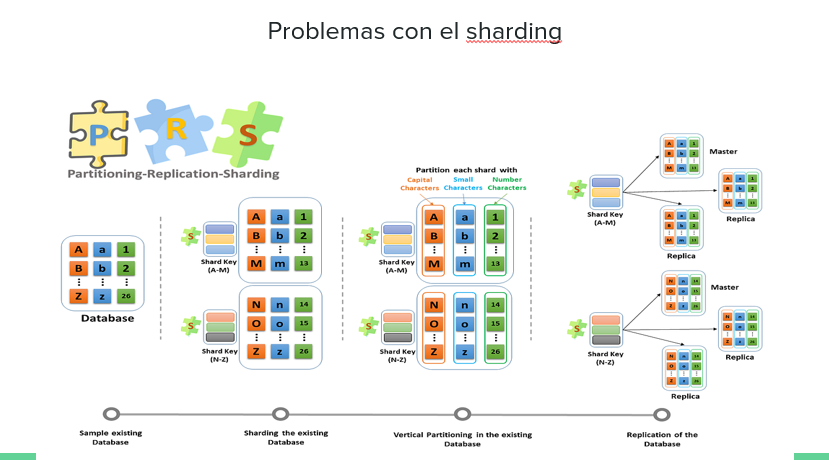

In [ ]:
from IPython.display import Image, display

display(Image('sharding.png'))


In [ ]:
import random
import string
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Función para generar datos ficticios
def generate_data(num_entries=20):
    data = []
    for _ in range(num_entries):
        letter = random.choice(string.ascii_letters)  # Mayúscula o minúscula
        number = random.randint(1, 99)  # Número aleatorio entre 1 y 99
        data.append((letter, number))
    return data

# Función para asignar shard basado en rango de letras
def assign_shard(letter):
    if 'A' <= letter <= 'M' or 'a' <= letter <= 'm':
        return "Shard_A-M"
    else:
        return "Shard_N-Z"

# Función para realizar particionamiento vertical dentro de cada shard
def partition_shard(shard_data):
    partitions = {
        "Capital Characters": [],
        "Small Characters": [],
        "Number Characters": []
    }
    for letter, number in shard_data:
        if letter.isupper():
            partitions["Capital Characters"].append((letter, number))
        elif letter.islower():
            partitions["Small Characters"].append((letter, number))
        # En este ejemplo, todos los números se guardan en "Number Characters"
        partitions["Number Characters"].append(number)
    return partitions

# Función para replicar datos (simulación)
def replicate_shard(partitions):
    # Crea dos copias (réplicas) del mismo contenido
    replicas = {
        "Replica_1": partitions.copy(),
        "Replica_2": partitions.copy()
    }
    return replicas

# 1. Generar datos ficticios
data = generate_data()

# Mostrar datos generados antes del sharding
df_data = pd.DataFrame(data, columns=['Character', 'Number'])
print("Datos Generados:")
display(df_data)

# 2. Asignar datos a shards
shards = defaultdict(list)
for entry in data:
    letter, number = entry
    shard_name = assign_shard(letter)
    shards[shard_name].append((letter, number))

# Mostrar datos después del sharding
df_shards = pd.DataFrame(
    [(shard, letter, number) for shard, shard_data in shards.items() for letter, number in shard_data],
    columns=['Shard', 'Character', 'Number']
)
print("\nDatos en Shards (Después de Sharding):")
display(df_shards)

# 3. Aplicar particionamiento vertical dentro de cada shard
sharded_data = {}
replicated_data = {}

for shard, shard_data in shards.items():
    # Particionamiento vertical
    sharded_data[shard] = partition_shard(shard_data)
    # Replicación de las particiones
    replicated_data[shard] = replicate_shard(sharded_data[shard])

# Mostrar datos después del particionamiento vertical
df_partitions = pd.DataFrame(
    [(shard, category, str(items)) for shard, partitions in sharded_data.items() for category, items in partitions.items()],
    columns=['Shard', 'Category', 'Data']
)
print("\nDatos en Shards (Después del Particionamiento Vertical):")
display(df_partitions)

# Mostrar datos después de la replicación
df_replicated = pd.DataFrame(
    [
        (shard, replica, category, str(items))
        for shard, replicas in replicated_data.items()
        for replica, replica_data in replicas.items()
        for category, items in replica_data.items()
    ],
    columns=['Shard', 'Replica', 'Category', 'Data']
)
print("\nDatos en Shards (Después de la Replicación):")
display(df_replicated)




Datos Generados:


,Character,Number
0,c,7
1,J,38
2,S,17
3,O,97
4,F,14
5,a,74
6,s,61
7,E,57
8,v,24
9,d,33



Datos en Shards (Después de Sharding):


,Shard,Character,Number
0,Shard_A-M,c,7
1,Shard_A-M,J,38
2,Shard_A-M,F,14
3,Shard_A-M,a,74
4,Shard_A-M,E,57
5,Shard_A-M,d,33
6,Shard_A-M,E,15
7,Shard_A-M,e,52
8,Shard_A-M,F,10
9,Shard_A-M,K,81



Datos en Shards (Después del Particionamiento Vertical):


,Shard,Category,Data
0,Shard_A-M,Capital Characters,"[('J', 38), ('F', 14), ('E', 57), ('E', 15), (..."
1,Shard_A-M,Small Characters,"[('c', 7), ('a', 74), ('d', 33), ('e', 52), ('..."
2,Shard_A-M,Number Characters,"[7, 38, 14, 74, 57, 33, 15, 52, 10, 81, 20, 98]"
3,Shard_N-Z,Capital Characters,"[('S', 17), ('O', 97), ('R', 7), ('Z', 73)]"
4,Shard_N-Z,Small Characters,"[('s', 61), ('v', 24), ('t', 11), ('p', 16)]"
5,Shard_N-Z,Number Characters,"[17, 97, 61, 24, 7, 73, 11, 16]"



Datos en Shards (Después de la Replicación):


,Shard,Replica,Category,Data
0,Shard_A-M,Replica_1,Capital Characters,"[('J', 38), ('F', 14), ('E', 57), ('E', 15), (..."
1,Shard_A-M,Replica_1,Small Characters,"[('c', 7), ('a', 74), ('d', 33), ('e', 52), ('..."
2,Shard_A-M,Replica_1,Number Characters,"[7, 38, 14, 74, 57, 33, 15, 52, 10, 81, 20, 98]"
3,Shard_A-M,Replica_2,Capital Characters,"[('J', 38), ('F', 14), ('E', 57), ('E', 15), (..."
4,Shard_A-M,Replica_2,Small Characters,"[('c', 7), ('a', 74), ('d', 33), ('e', 52), ('..."
5,Shard_A-M,Replica_2,Number Characters,"[7, 38, 14, 74, 57, 33, 15, 52, 10, 81, 20, 98]"
6,Shard_N-Z,Replica_1,Capital Characters,"[('S', 17), ('O', 97), ('R', 7), ('Z', 73)]"
7,Shard_N-Z,Replica_1,Small Characters,"[('s', 61), ('v', 24), ('t', 11), ('p', 16)]"
8,Shard_N-Z,Replica_1,Number Characters,"[17, 97, 61, 24, 7, 73, 11, 16]"
9,Shard_N-Z,Replica_2,Capital Characters,"[('S', 17), ('O', 97), ('R', 7), ('Z', 73)]"


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>¿Qué es una Función Hash y Cómo Transforma un Número?</title>

  <!-- Carga asíncrona de MathJax (para fórmulas matemáticas) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>

  <style>
    /* Contenedor centralizado con ancho máximo */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }

    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }

    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }

    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }

    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }

    li {
      margin-bottom: 10px;
    }

    a {
      color: #2980b9;
      text-decoration: none;
      transition: color 0.3s;
    }
    a:hover {
      text-decoration: underline;
    }

    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }

    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }

    /* Diseño responsivo */
    @media (max-width: 600px) {
      body {
        padding: 10px;
      }
      p, ul, ol {
        padding: 10px;
      }
    }

    /* Estilos para secciones colapsables */
    details {
      border: 1px solid #ccc;
      border-radius: 4px;
      margin-bottom: 15px;
      padding: 10px;
    }
    summary {
      font-size: 1.2em;
      font-weight: bold;
      cursor: pointer;
      outline: none;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <!-- Título principal -->
    <h1>¿Qué es una Función Hash y Cómo Transforma un Número?</h1>

    <!-- Sección 1: Introducción -->
    <details>
      <summary>1. Introducción</summary>
      <p>
        Una <span class="keyword">función hash</span> es un <span class="keyword">algoritmo</span> que convierte una entrada
        de cualquier tamaño en un valor de longitud fija. Se utilizan en:
      </p>
      <ul>
        <li>Almacenamiento y búsqueda eficiente (tablas hash).</li>
        <li>Verificación de integridad y firmas digitales en criptografía.</li>
        <li>Distribución de datos (por ejemplo, en sharding).</li>
      </ul>
      <p>
        Su objetivo es <span class="keyword">distribuir uniformemente</span> los datos de entrada en un espacio de salida
        (por ejemplo, 128 bits para MD5 o 256 bits para SHA-256), haciendo difícil predecir o revertir la función.
      </p>
    </details>

    <!-- Sección 2: Definición Formal de una Función Hash -->
    <details>
      <summary>2. Definición Formal</summary>
      <p>
        Matemáticamente, una función hash puede verse como:
      </p>
      <p style="text-align: center; font-size: 1.2em;">
        <em>H: X → Y</em>
      </p>
      <p>donde:</p>
      <ul>
        <li><span class="keyword">X</span> es el conjunto de entradas (números, textos, archivos, etc.).</li>
        <li><span class="keyword">Y</span> es el conjunto de salidas (valores de longitud fija).</li>
      </ul>
      <p>Debe cumplir con propiedades como:</p>
      <ul>
        <li><span class="keyword">Determinística</span>: la misma entrada siempre produce la misma salida.</li>
        <li><span class="keyword">Eficiente</span>: debe calcularse rápidamente incluso para grandes volúmenes de datos.</li>
        <li><span class="keyword">Uniforme</span>: las salidas deben distribuirse de forma pareja en su espacio de valores.</li>
      </ul>
    </details>

    <!-- Sección 3: Cómo se Transforma un Número -->
    <details>
      <summary>3. Cómo se Transforma un Número</summary>
      <p>
        Supongamos que tienes un número <em>n</em>. Al aplicar una función hash <em>H(n)</em>, obtienes un
        <span class="keyword">hash</span> (cadena o valor) de longitud fija. Por ejemplo, si <em>n = 1234</em> y
        utilizas una función hash sencilla (imaginaria):
      </p>
      <p style="text-align: center; font-size: 1.2em;">
        <em>H(1234) = 9F2A...</em>
      </p>
      <p>
        En la práctica, funciones como <span class="keyword">SHA-256</span> producirían una cadena de 64 caracteres
        hexadecimales. El punto clave es que la salida no revela el valor original fácilmente y es
        extremadamente difícil (o computacionalmente inviable) revertir la función para recuperar <em>n</em>.
      </p>
    </details>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

# Muestra el contenido HTML y activa MathJax
display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

In [ ]:
import hashlib

num = 102
hash_hex = hashlib.md5(str(num).encode()).hexdigest()

print(f"User ID: {num}")
print(f"Hash MD5 (hex): {hash_hex}")


User ID: 102
Hash MD5 (hex): ec8956637a99787bd197eacd77acce5e


In [ ]:
import hashlib

# ===========================
# Ejemplo de uso de hashlib:
# ===========================
# 1. Convertimos un valor numérico en cadena de texto.
# 2. Codificamos esa cadena a bytes (UTF-8 por defecto).
# 3. Calculamos el hash con un algoritmo específico (MD5 o SHA-256).
# 4. Obtenemos la representación en hexadecimal (hexdigest).
#
# NOTA:
# - MD5 genera un hash de 128 bits (32 caracteres hexadecimales).
# - Para mayor seguridad criptográfica, se recomienda usar algoritmos más robustos
#   como SHA-256, SHA-3 o BLAKE2.
# ===========================

# Ejemplo: Generar el hash MD5 de un número
user_id = 102

# Convertimos el número a cadena y luego a bytes
user_id_bytes = str(user_id).encode('utf-8')

# Calculamos el hash MD5
md5_hash = hashlib.md5(user_id_bytes).hexdigest()

print(f"User ID: {user_id}")
print(f"MD5 hash (hex): {md5_hash}")
print(f"Longitud del hash MD5: {len(md5_hash)} caracteres")

# Ejemplo adicional: Generar el hash SHA-256 del mismo número
sha256_hash = hashlib.sha256(user_id_bytes).hexdigest()

print(f"\nSHA-256 hash (hex): {sha256_hash}")
print(f"Longitud del hash SHA-256: {len(sha256_hash)} caracteres")


User ID: 102
MD5 hash (hex): ec8956637a99787bd197eacd77acce5e
Longitud del hash MD5: 32 caracteres

SHA-256 hash (hex): 37834f2f25762f23e1f74a531cbe445db73d6765ebe60878a7dfbecd7d4af6e1
Longitud del hash SHA-256: 64 caracteres


In [ ]:
hash_int = int(hash_hex, 16)  # Convierte de hexadecimal a entero
print(f"Hash MD5 (int): {hash_int}")


Hash MD5 (int): 140175431361313732288440547599619953992


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Propiedades Clave de una Función Hash</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }

    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }

    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }

    h1, h2, h3 {
      color: #2c3e50;
    }

    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }

    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }

    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }

    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }

    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }

    body.dark-mode table,
    body.dark-mode th,
    body.dark-mode td {
      border: 1px solid #ecf0f1;
    }

    th {
      background-color: #ecf0f1;
    }

    body.dark-mode th {
      background-color: #34495e;
    }

    /* Filas zebra en tablas */
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }

    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }

    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }

    .theme-toggle:hover {
      background-color: #2980b9;
    }

    /* Diseño responsivo */
    @media (max-width: 600px) {
      body {
        padding: 10px;
      }
      p, ul, ol {
        padding: 10px;
      }
      table, th, td {
        font-size: 0.9em;
      }
    }

    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <article>
      <h1>Propiedades Clave de una Función Hash</h1>
      <p>
        Para entender por qué se usa en <span class="keyword">sharding</span>, veamos sus propiedades clave:
      </p>
      <table>
        <thead>
          <tr>
            <th>Propiedad</th>
            <th>Explicación</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Determinismo</td>
            <td><em>hash(101)</em> siempre dará el mismo resultado.</td>
          </tr>
          <tr>
            <td>Distribución Uniforme</td>
            <td>Diferentes entradas generan valores numéricos ampliamente distribuidos.</td>
          </tr>
          <tr>
            <td>Resistencia a Colisiones</td>
            <td>Es improbable que dos números diferentes tengan el mismo hash.</td>
          </tr>
          <tr>
            <td>Longitud Fija</td>
            <td>Sin importar el tamaño de la entrada, la salida tiene la misma longitud (128 bits en MD5).</td>
          </tr>
        </tbody>
      </table>
    </article>
  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Propiedad,Explicación
Determinismo,hash(101) siempre dará el mismo resultado.
Distribución Uniforme,Diferentes entradas generan valores numéricos ampliamente distribuidos.
Resistencia a Colisiones,Es improbable que dos números diferentes tengan el mismo hash.
Longitud Fija,"Sin importar el tamaño de la entrada, la salida tiene la misma longitud (128 bits en MD5)."


<IPython.core.display.Javascript object>


--- Proceso de Hashing y Asignación de Shards ---

User ID: 101
 - Hash MD5 (hex): 38b3eff8baf56627478ec76a704e9b52
 - Hash MD5 (int): 75371056103973480373443517203033791314
 - Shard asignado: Shard_2

User ID: 202
 - Hash MD5 (hex): 854d6fae5ee42911677c739ee1734486
 - Hash MD5 (int): 177189395460034695589170967685897602182
 - Shard asignado: Shard_2

User ID: 303
 - Hash MD5 (hex): 11b9842e0a271ff252c1903e7132cd68
 - Hash MD5 (int): 23560131772877819695913014187114286440
 - Shard asignado: Shard_0

User ID: 404
 - Hash MD5 (hex): 4f4adcbf8c6f66dcfc8a3282ac2bf10a
 - Hash MD5 (int): 105397718940694352694721658413621440778
 - Shard asignado: Shard_2

User ID: 505
 - Hash MD5 (hex): e8c0653fea13f91bf3c48159f7c24f78
 - Hash MD5 (int): 309379869606127014909376235583693803384
 - Shard asignado: Shard_0

User ID: 606
 - Hash MD5 (hex): 44c4c17332cace2124a1a836d9fc4b6f
 - Hash MD5 (int): 91409117529658726410948512375656696687
 - Shard asignado: Shard_3

User ID: 707
 - Hash MD5 (hex): 500e75a

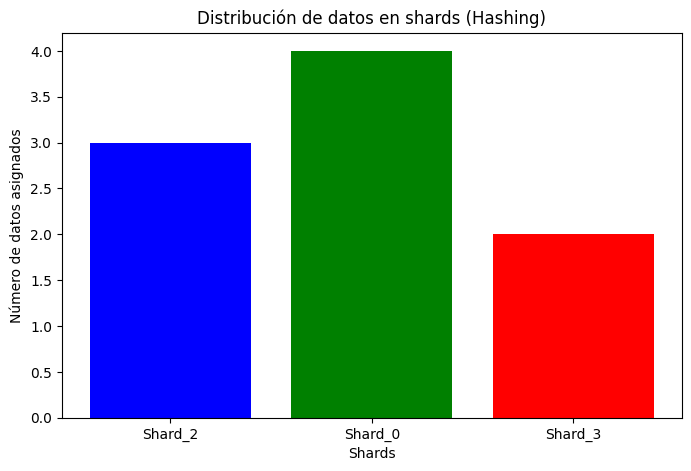

In [ ]:
import hashlib
import matplotlib.pyplot as plt
from collections import defaultdict

# Definir el número de shards
NUM_SHARDS = 4

# Función para calcular el hash y asignar un shard
def assign_shard(key):
    hash_hex = hashlib.md5(str(key).encode()).hexdigest()
    hash_value = int(hash_hex, 16)
    shard_number = hash_value % NUM_SHARDS

    print(f"User ID: {key}")
    print(f" - Hash MD5 (hex): {hash_hex}")
    print(f" - Hash MD5 (int): {hash_value}")
    print(f" - Shard asignado: Shard_{shard_number}\n")

    return f"Shard_{shard_number}"

# Generar datos ficticios (user_id y datos asociados)
data_entries = [
    (101, "User_A"),
    (202, "User_B"),
    (303, "User_C"),
    (404, "User_D"),
    (505, "User_E"),
    (606, "User_F"),
    (707, "User_G"),
    (808, "User_H"),
    (909, "User_I"),
]

# Diccionario para almacenar los datos en shards
shards = defaultdict(list)

# Asignar cada entrada a un shard usando hashing
print("\n--- Proceso de Hashing y Asignación de Shards ---\n")
for user_id, user_name in data_entries:
    shard_name = assign_shard(user_id)
    shards[shard_name].append((user_id, user_name))

# Mostrar la distribución final de los datos en los shards
print("\n--- Distribución Final en Shards ---")
for shard, entries in shards.items():
    print(f"\n{shard}: {entries}")

# Visualizar la distribución de los shards
shard_labels = list(shards.keys())
shard_sizes = [len(entries) for entries in shards.values()]

plt.figure(figsize=(8, 5))
plt.bar(shard_labels, shard_sizes, color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Shards")
plt.ylabel("Número de datos asignados")
plt.title("Distribución de datos en shards (Hashing)")
plt.show()





--- Distribución de Datos en los Shards ---
Shard_0: 261 datos
Shard_1: 268 datos
Shard_2: 236 datos
Shard_3: 235 datos


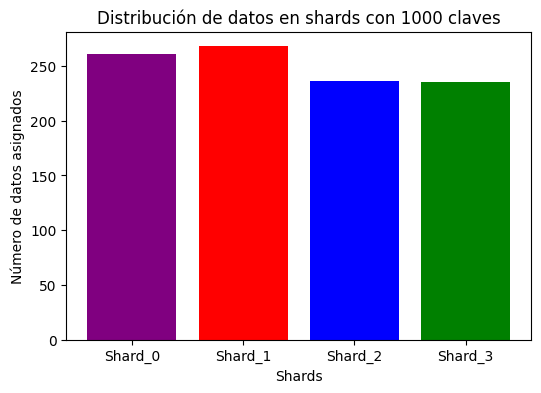

In [ ]:
import hashlib
import random
from collections import defaultdict
import matplotlib.pyplot as plt

# Número de shards
NUM_SHARDS = 4

# Función para calcular el shard usando hash
def assign_shard(key):
    hash_hex = hashlib.md5(str(key).encode()).hexdigest()
    hash_value = int(hash_hex, 16)
    return hash_value % NUM_SHARDS

# Generar 1000 IDs aleatorios
random.seed(42)  # Fijamos la semilla para resultados consistentes
data_entries = [random.randint(1, 1000000) for _ in range(1000)]

# Diccionario para almacenar la cantidad de datos en cada shard
shard_distribution = defaultdict(int)

# Asignar datos a shards
for user_id in data_entries:
    shard_number = assign_shard(user_id)
    shard_distribution[shard_number] += 1

# Mostrar la distribución
print("\n--- Distribución de Datos en los Shards ---")
for shard, count in sorted(shard_distribution.items()):
    print(f"Shard_{shard}: {count} datos")

# Graficar la distribución
plt.figure(figsize=(6, 4))
plt.bar(shard_distribution.keys(), shard_distribution.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Shards")
plt.ylabel("Número de datos asignados")
plt.title("Distribución de datos en shards con 1000 claves")
plt.xticks(range(NUM_SHARDS), [f"Shard_{i}" for i in range(NUM_SHARDS)])
plt.show()


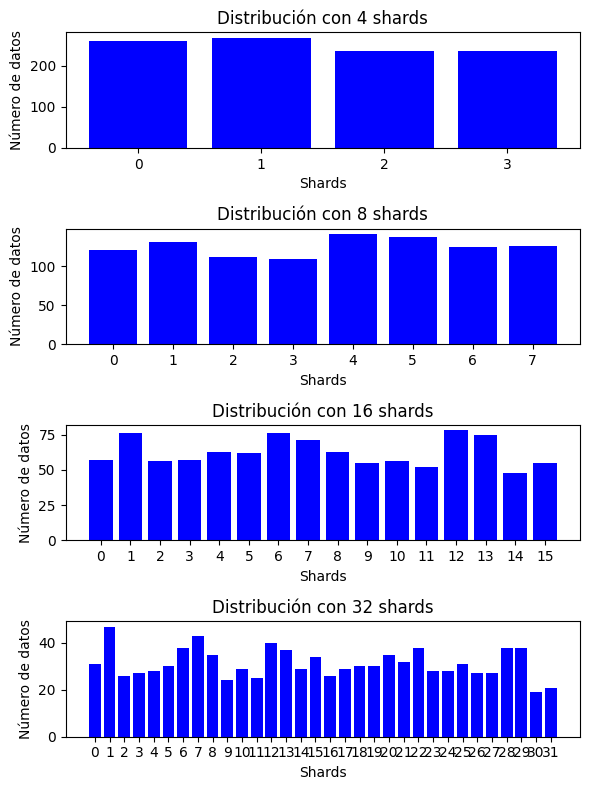

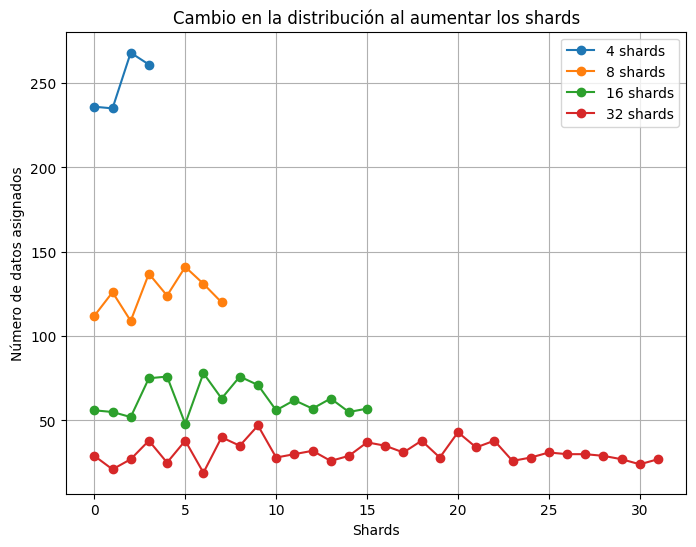

In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Lista de diferentes números de shards para analizar la redistribución
shard_sizes = [4, 8, 16, 32]  # Prueba con diferentes cantidades de shards

# Generar 1000 IDs aleatorios
random.seed(42)  # Fijamos la semilla para reproducibilidad
data_entries = [random.randint(1, 1000000) for _ in range(1000)]

# Almacenar la distribución de cada experimento
shard_distributions = {}

# Función para asignar shards sin sharding consistente
def assign_shard(key, num_shards):
    hash_hex = hashlib.md5(str(key).encode()).hexdigest()
    hash_value = int(hash_hex, 16)
    return hash_value % num_shards

# Evaluar la distribución para diferentes números de shards
for num_shards in shard_sizes:
    shard_distribution = defaultdict(int)

    for user_id in data_entries:
        shard_number = assign_shard(user_id, num_shards)
        shard_distribution[shard_number] += 1

    shard_distributions[num_shards] = shard_distribution

# Graficar la distribución para cada número de shards
fig, axes = plt.subplots(len(shard_sizes), 1, figsize=(6, 8))

for i, num_shards in enumerate(shard_sizes):
    ax = axes[i]
    distribution = shard_distributions[num_shards]

    ax.bar(distribution.keys(), distribution.values(), color='blue')
    ax.set_xlabel("Shards")
    ax.set_ylabel("Número de datos")
    ax.set_title(f"Distribución con {num_shards} shards")
    ax.set_xticks(range(num_shards))

plt.tight_layout()
plt.show()

# Mostrar cómo los datos cambian entre diferentes números de shards
plt.figure(figsize=(8, 6))

for num_shards in shard_sizes:
    shard_counts = list(shard_distributions[num_shards].values())
    plt.plot(range(num_shards), shard_counts, marker='o', label=f"{num_shards} shards")

plt.xlabel("Shards")
plt.ylabel("Número de datos asignados")
plt.title("Cambio en la distribución al aumentar los shards")
plt.legend()
plt.grid(True)
plt.show()



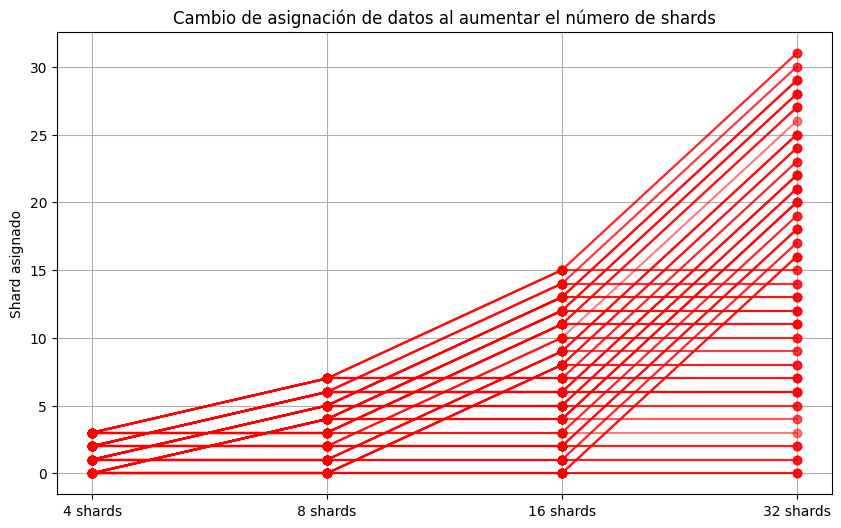

In [ ]:
import hashlib
import random
import matplotlib.pyplot as plt
import numpy as np

# Lista de diferentes números de shards
shard_sizes = [4, 8, 16, 32]  # Diferentes tamaños de shard a analizar

# Generar 200 IDs aleatorios para hacer más visible el cambio
random.seed(42)  # Fijamos la semilla para consistencia
data_entries = [random.randint(1, 1000000) for _ in range(200)]

# Función para asignar shards sin sharding consistente
def assign_shard(key, num_shards):
    hash_hex = hashlib.md5(str(key).encode()).hexdigest()
    hash_value = int(hash_hex, 16)
    return hash_value % num_shards

# Almacenar en qué shard cae cada dato según el número de shards
shard_assignments = {num_shards: [] for num_shards in shard_sizes}

# Calcular asignaciones para cada configuración de shards
for num_shards in shard_sizes:
    shard_assignments[num_shards] = [assign_shard(user_id, num_shards) for user_id in data_entries]

# Graficar cómo los datos cambian de shard
plt.figure(figsize=(10, 6))

for i in range(len(data_entries)):  # Para cada dato
    prev_shard = None
    for num_shards in shard_sizes:
        current_shard = shard_assignments[num_shards][i]
        if prev_shard is not None:
            plt.plot([shard_sizes.index(prev_num_shards), shard_sizes.index(num_shards)],
                     [prev_shard, current_shard], 'ro-', alpha=0.3)  # Línea roja con transparencia
        prev_shard = current_shard
        prev_num_shards = num_shards

# Etiquetas y título
plt.xticks(range(len(shard_sizes)), [f"{s} shards" for s in shard_sizes])
plt.ylabel("Shard asignado")
plt.title("Cambio de asignación de datos al aumentar el número de shards")
plt.grid(True)
plt.show()


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Problema del Hashing Tradicional y Sharding Consistente</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    code {
      background: #ecf0f1;
      padding: 2px 4px;
      border-radius: 3px;
      font-family: monospace;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Diseño responsivo */
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Secciones colapsables */
    details {
      border: 1px solid #ccc;
      border-radius: 4px;
      margin-bottom: 15px;
      padding: 10px;
    }
    summary {
      font-size: 1.2em;
      font-weight: bold;
      cursor: pointer;
      outline: none;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <!-- Título principal -->
    <h1>Problema del Hashing Tradicional y Sharding Consistente</h1>

    <!-- Sección 1: El problema del hashing tradicional -->
    <details>
      <summary>1. El problema del Hashing Tradicional</summary>
      <p>
        En un sistema distribuido, se suele utilizar la estrategia <code>hash(key) % num_shards</code> para
        decidir a qué nodo o shard enviar cada dato. Sin embargo, cuando el número de shards
        cambia (por ejemplo, al agregar o eliminar servidores), la mayoría de las claves
        deben reasignarse, causando:
      </p>
      <ul>
        <li><strong>Sobreutilización de la red</strong>, porque muchos datos deben migrarse de un shard a otro.</li>
        <li><strong>Altos tiempos de latencia</strong> mientras el sistema se reorganiza.</li>
        <li><strong>Riesgo de inconsistencias</strong> durante la transición, al no saber dónde se encuentra cada dato en un momento dado.</li>
      </ul>
      <p>
        Como profesor de sistemas distribuidos, siempre subrayo que el enfoque
        <span class="keyword">hash(key) % num_shards</span> es simple, pero no es escalable en
        entornos donde se agregan o retiran nodos con frecuencia. El sistema se ve obligado
        a reubicar la mayoría de los datos, lo cual es costoso y puede provocar cuellos de
        botella y caída de rendimiento.
      </p>
    </details>

    <!-- Sección 2: Sharding Consistente (Consistent Hashing) -->
    <details>
      <summary>2. Sharding Consistente (Consistent Hashing)</summary>
      <p>
        El <span class="keyword">Sharding Consistente</span> es la solución más efectiva para
        minimizar el problema de la reasignación masiva de datos. Consiste en mapear tanto
        los nodos (shards) como las claves de los datos a un anillo virtual.
      </p>
      <p>
        <strong>¿Cómo funciona?</strong> Cada nodo se ubica en una o varias posiciones del anillo
        mediante una función hash. Cuando necesitamos ubicar un dato, calculamos su
        hash y lo colocamos en el anillo. La regla es que ese dato pertenezca al
        nodo que se encuentre inmediatamente después en sentido horario.
      </p>
      <p>
        <strong>Ventajas principales:</strong>
      </p>
      <ul>
        <li><strong>Menor redistribución de datos</strong> al agregar o quitar nodos. Solo los datos que estaban asociados al nodo afectado deben moverse.</li>
        <li><strong>Escalabilidad dinámica</strong>: el sistema puede crecer o decrecer sin causar un gran reacomodo de información.</li>
        <li><strong>Balance de carga</strong>: si se asignan múltiples posiciones en el anillo a cada nodo, se puede mejorar la distribución de datos.</li>
      </ul>
      <p>
        En la práctica, sistemas como <strong>Amazon DynamoDB</strong>, <strong>Apache Cassandra</strong> y
        <strong>Voldemort</strong> utilizan este modelo, garantizando una alta disponibilidad y
        escalabilidad con cambios mínimos en la asignación de datos.
      </p>
    </details>

    <!-- Sección 3: Ejemplo Ilustrativo -->
    <details>
      <summary>3. Ejemplo Ilustrativo</summary>
      <p>
        Imagina un anillo con un rango de valores de hash desde <code>0x0000</code> (0) hasta
        <code>0xFFFF</code> (65535). Supongamos que tenemos 4 shards:
      </p>
      <ul>
        <li><em>Shard A</em>: hash = <code>0x1A2B</code> (6699 en decimal)</li>
        <li><em>Shard B</em>: hash = <code>0x3C4D</code> (15437 en decimal)</li>
        <li><em>Shard C</em>: hash = <code>0x6F70</code> (28528 en decimal)</li>
        <li><em>Shard D</em>: hash = <code>0xABCD</code> (43981 en decimal)</li>
      </ul>
      <p>
        Cuando ingresa una clave con valor hash <code>0x5000</code> (20480 en decimal), la buscamos en el anillo
        y se asigna al siguiente nodo en sentido horario, que en este caso sería
        <em>Shard C</em> (0x6F70).
      </p>
      <p>
        Si agregamos un nuevo nodo <em>Shard E</em> con hash <code>0x5001</code> (20481 en decimal),
        únicamente las claves que estén entre <code>0x5000</code> y <code>0x5001</code> se moverán al nuevo shard,
        en lugar de tener que mover todas las claves.
      </p>
    </details>

    <!-- Sección 4: Conclusión -->
    <details>
      <summary>4. Conclusión</summary>
      <p>
        El sharding consistente representa un salto evolutivo frente al hashing tradicional,
        especialmente en sistemas distribuidos de gran escala. Su fortaleza radica en la
        estabilidad de la asignación de datos, ya que <span class="keyword">solo se mueven
        aquellos datos que cambian de rango</span> al modificar la cantidad de shards.
      </p>
      <p>
        En la materia recomiendo siempre considerar este enfoque cuando
        se diseñan arquitecturas escalables y resilientes. Aunque es un poco más
        complejo de implementar, <strong>el beneficio de evitar migraciones masivas de datos
        compensa ampliamente</strong> la complejidad inicial.
      </p>
    </details>

  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Hashing y Sharding Mejorado</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado con ancho máximo */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }

    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }

    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }

    h1, h2, h3 {
      color: #2c3e50;
    }

    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }

    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }

    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }

    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }

    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }

    body.dark-mode table,
    body.dark-mode th,
    body.dark-mode td {
      border: 1px solid #ecf0f1;
    }

    th {
      background-color: #ecf0f1;
    }

    body.dark-mode th {
      background-color: #34495e;
    }

    /* Filas zebra en tablas */
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }
    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }

    pre {
      background: #ecf0f1;
      padding: 10px;
      overflow: auto;
      box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
    }

    body.dark-mode pre {
      background: #34495e;
    }

    a {
      color: #2980b9;
      text-decoration: none;
      transition: color 0.3s;
    }

    a:hover {
      text-decoration: underline;
    }

    /* Resalta palabras clave en el contenido */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }

    /* Diseño responsivo */
    @media (max-width: 600px) {
      body {
        padding: 10px;
      }
      p, ul, ol {
        padding: 10px;
      }
      table, th, td {
        font-size: 0.9em;
      }
    }

    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }

    .theme-toggle:hover {
      background-color: #2980b9;
    }

    /* Estilos para secciones colapsables */
    details {
      border: 1px solid #ccc;
      border-radius: 4px;
      margin-bottom: 15px;
      padding: 10px;
    }
    summary {
      font-size: 1.2em;
      font-weight: bold;
      cursor: pointer;
      outline: none;
    }

  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <article>
      <h1>Hashing y Sharding</h1>

      <!-- Sección 1 -->
      <details>
        <summary>1. Hashing y Re-Sharding Dinámico</summary>
        <p>
          Hemos visto que una función <span class="keyword">hash</span> convierte una clave en un número distribuido de forma uniforme, lo cual es ideal para asignar <span class="keyword">shards</span>. ¿Pero qué pasa si queremos añadir más shards sin afectar la distribución?
        </p>
        <p>
          <strong>Problema:</strong> Si tenemos 4 shards y usamos <em>hash(key) % 4</em>, cada dato se asigna a un shard fijo. Pero si aumentamos a 8 shards, el módulo cambia y todos los datos deben redistribuirse, lo que es costoso en sistemas en producción.
        </p>
        <p>
          <strong>Solución: <span class="keyword">Hashing Consistente</span></strong> – En lugar de usar <em>hash(key) % N</em>, usamos una estructura de anillo hash (<span class="keyword">Consistent Hashing</span>) para minimizar la redistribución. Esto nos permite agregar o quitar shards sin tener que reorganizar todos los datos.
        </p>
        <p>
          <strong>Ventaja:</strong> Reduce la cantidad de claves que deben moverse cuando se agregan nuevos servidores.
        </p>
      </details>

      <!-- Sección 2 -->
      <details>
        <summary>2. Trade-offs entre Sharding Estático y Dinámico</summary>
        <p>
          Los sistemas pueden optar por diferentes estrategias de <span class="keyword">sharding</span> dependiendo de su necesidad de escalabilidad:
        </p>
        <table>
          <thead>
            <tr>
              <th>Tipo de Sharding</th>
              <th>Ventajas</th>
              <th>Desventajas</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td>Sharding Fijo (<em>hash(key) % N</em>)</td>
              <td>Rápido, fácil de implementar</td>
              <td>Difícil de escalar sin redistribuir todos los datos</td>
            </tr>
            <tr>
              <td>Sharding con <span class="keyword">Hashing Consistente</span></td>
              <td>Permite agregar/eliminar shards sin grandes redistribuciones</td>
              <td>Más complejo de implementar</td>
            </tr>
            <tr>
              <td>Sharding con Metadata Centralizada</td>
              <td>Cada shard maneja su propia distribución de datos</td>
              <td>Puede ser un punto de falla centralizado</td>
            </tr>
          </tbody>
        </table>
      </details>

      <!-- Sección 3 -->
      <details>
        <summary>3. Rebalanceo de Carga en Sharding</summary>
        <p>
          Incluso con <span class="keyword">hashing</span>, en sistemas en producción podemos tener shards desbalanceados. Algunas estrategias para manejar esto incluyen:
        </p>
        <ul>
          <li><strong>Re-Sharding Activo:</strong> Reorganización de los shards cuando detectamos sobrecarga.</li>
          <li><strong>Load Balancing Inteligente:</strong> Redistribuir claves usando métricas en tiempo real.</li>
          <li><strong>Micro-sharding:</strong> En lugar de shards grandes, creamos sub-shards que podemos mover más fácilmente entre servidores.</li>
        </ul>
      </details>

      <!-- Sección 4 -->
      <details>
        <summary>4. Sharding vs. Replicación: Diferencias Clave</summary>
        <p>
          Algunas personas confunden <span class="keyword">sharding</span> con <span class="keyword">replicación</span>, pero son conceptos distintos:
        </p>
        <table>
          <thead>
            <tr>
              <th>Aspecto</th>
              <th>Sharding</th>
              <th>Replicación</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td>Propósito</td>
              <td>Dividir datos en múltiples servidores para escalabilidad</td>
              <td>Copiar datos en múltiples servidores para redundancia</td>
            </tr>
            <tr>
              <td>Acceso a datos</td>
              <td>Cada shard tiene datos únicos</td>
              <td>Cada réplica tiene los mismos datos</td>
            </tr>
            <tr>
              <td>Uso común</td>
              <td>Bases de datos con gran cantidad de datos distribuidos</td>
              <td>Sistemas que necesitan tolerancia a fallos (ej. bases de datos bancarias)</td>
            </tr>
          </tbody>
        </table>
        <p>
          <strong>Ejemplo:</strong>
        </p>
        <ul>
          <li>Facebook usa <span class="keyword">sharding</span> para distribuir datos de usuarios entre servidores.</li>
          <li>Google Spanner usa <span class="keyword">replicación</span> para garantizar consistencia global en transacciones.</li>
        </ul>
      </details>

      <!-- Sección 5 -->
      <details>
        <summary>5. Arquitecturas de Sharding en Diferentes Tecnologías</summary>
        <p>
          Diferentes bases de datos utilizan estrategias de <span class="keyword">sharding</span> con distintas técnicas:
        </p>
        <table>
          <thead>
            <tr>
              <th>Base de Datos</th>
              <th>Técnica de Sharding</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td>MongoDB</td>
              <td>Sharding por Hash, Rango o Zonas</td>
            </tr>
            <tr>
              <td>Cassandra</td>
              <td><span class="keyword">Hashing Consistente</span></td>
            </tr>
            <tr>
              <td>MySQL Cluster</td>
              <td>Sharding Manual con Proxy</td>
            </tr>
            <tr>
              <td>Google BigTable</td>
              <td>Sharding por Prefijos de Clave</td>
            </tr>
          </tbody>
        </table>
        <p>
          <strong>Ejemplo en MongoDB:</strong>
        </p>
        <pre>
sh.enableSharding("miBaseDeDatos")
sh.shardCollection("miBaseDeDatos.miColeccion", { "user_id": "hashed" })
        </pre>
      </details>

      <!-- Sección 6 -->
      <details>
        <summary>6. Sharding en Sistemas Distribuidos Modernos</summary>
        <p>
          Los Data Lakes, Microservicios y Bases NoSQL han llevado el <span class="keyword">sharding</span> a un nuevo nivel:
        </p>
        <ul>
          <li><strong>Data Lakes:</strong> usan <span class="keyword">sharding</span> para particionar datos en HDFS, S3 o Google Cloud Storage.</li>
          <li><strong>Microservicios:</strong> pueden aplicar <span class="keyword">sharding</span> por región geográfica para mejorar latencia.</li>
          <li><strong>Blockchain:</strong> usa <span class="keyword">sharding</span> en tecnologías como Ethereum 2.0 para procesar transacciones en paralelo.</li>
        </ul>
        <p>
          <strong>Ejemplo de Sharding Geográfico en Microservicios:</strong>
        </p>
        <ul>
          <li>Usuarios en Europa &rarr; Shard en AWS Frankfurt</li>
          <li>Usuarios en América &rarr; Shard en AWS Virginia</li>
          <li>Usuarios en Asia &rarr; Shard en Google Cloud Tokio</li>
        </ul>
        <p>
          Esto reduce latencia y mejora escalabilidad.
        </p>
      </details>

    </article>
  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))



<IPython.core.display.Javascript object>

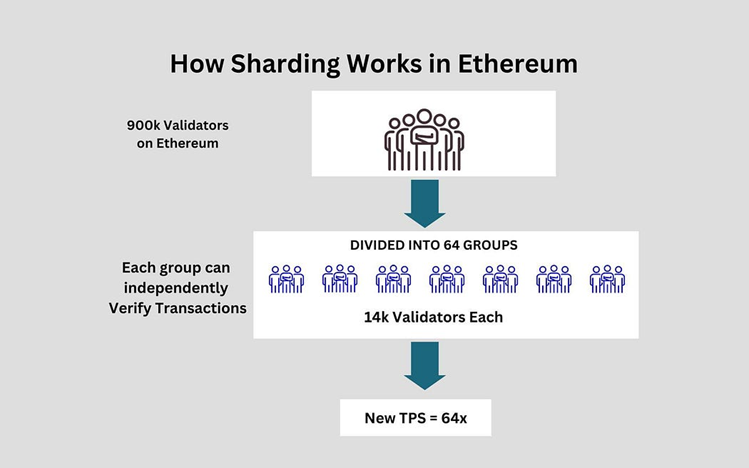

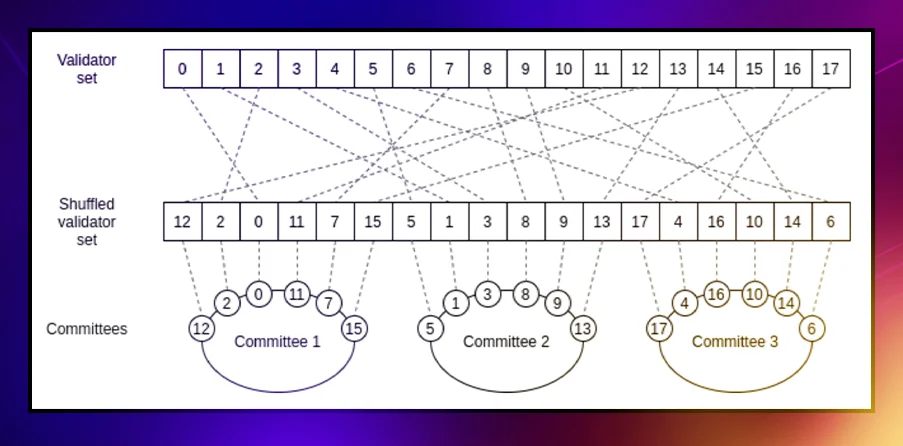

In [ ]:
from IPython.display import Image, display

# Mostrar la primera imagen
display(Image('sharding etherum1.png'))

# Mostrar la segunda imagen
display(Image('sharding etherum2.png'))


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>Ethereum vs. Bitcoin: Sharding y Escalabilidad</title>

  <!-- Carga asíncrona de MathJax (para fórmulas matemáticas, si fuera necesario) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>

  <style>
    /* Contenedor centralizado con ancho máximo */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }

    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }

    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }

    h1, h2, h3 {
      color: #2c3e50;
    }

    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }

    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }

    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }

    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }

    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }

    body.dark-mode table,
    body.dark-mode th,
    body.dark-mode td {
      border: 1px solid #ecf0f1;
    }

    th {
      background-color: #ecf0f1;
    }

    body.dark-mode th {
      background-color: #34495e;
    }

    /* Filas zebra en tablas */
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }
    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }

    pre {
      background: #ecf0f1;
      padding: 10px;
      overflow: auto;
      box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
    }

    body.dark-mode pre {
      background: #34495e;
    }

    a {
      color: #2980b9;
      text-decoration: none;
      transition: color 0.3s;
    }

    a:hover {
      text-decoration: underline;
    }

    /* Resalta palabras clave en el contenido */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }

    /* Diseño responsivo */
    @media (max-width: 600px) {
      body {
        padding: 10px;
      }
      p, ul, ol {
        padding: 10px;
      }
      table, th, td {
        font-size: 0.9em;
      }
    }

    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }

    .theme-toggle:hover {
      background-color: #2980b9;
    }

    /* Secciones colapsables */
    details {
      border: 1px solid #ccc;
      border-radius: 4px;
      margin-bottom: 15px;
      padding: 10px;
    }
    summary {
      font-size: 1.2em;
      font-weight: bold;
      cursor: pointer;
      outline: none;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>

    <h1>Ethereum vs. Bitcoin: Sharding y Escalabilidad</h1>

    <!-- Sección 1: Cómo funciona Ethereum y su implementación de sharding -->
    <details>
      <summary>1. Cómo funciona Ethereum y su implementación de sharding</summary>
      <p>
        Ethereum es una blockchain de código abierto y programable que permite la ejecución de contratos inteligentes y aplicaciones descentralizadas (DApps). Actualmente, utiliza un sistema de Prueba de Participación (Proof of Stake - PoS) donde los validadores aseguran la red verificando y confirmando transacciones.
      </p>
      <p>
        Para mejorar su escalabilidad, Ethereum implementa sharding, una técnica que divide la red en 64 fragmentos (shards). Cada shard opera como una mini-blockchain independiente con su propio grupo de validadores, lo que permite procesar múltiples transacciones en paralelo. Esto reduce la congestión y mejora la velocidad, aumentando la capacidad de Ethereum hasta 64 veces.
      </p>
    </details>

    <!-- Sección 2: Comparación con Bitcoin (tabla) -->
    <details>
      <summary>2. Comparación con Bitcoin</summary>
      <p>Característica comparación:</p>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>Ethereum con Sharding</th>
            <th>Bitcoin sin Sharding</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Consenso</td>
            <td>Prueba de Participación (PoS)</td>
            <td>Prueba de Trabajo (PoW)</td>
          </tr>
          <tr>
            <td>Escalabilidad</td>
            <td>Sharding: 64 shards procesan transacciones en paralelo</td>
            <td>No tiene sharding; todos los nodos procesan todas las transacciones</td>
          </tr>
          <tr>
            <td>Seguridad</td>
            <td>Se mantiene con validadores rotativos</td>
            <td>Máxima seguridad gracias a PoW y mineros</td>
          </tr>
          <tr>
            <td>Transacciones por segundo (TPS)</td>
            <td>Aumenta hasta 64 veces con sharding</td>
            <td>Limitado a ~7 TPS</td>
          </tr>
          <tr>
            <td>Soluciones de escalabilidad</td>
            <td>Sharding + Capa 2 (Rollups)</td>
            <td>Lightning Network + mejoras en la cadena principal (SegWit, Taproot)</td>
          </tr>
          <tr>
            <td>Prioridad</td>
            <td>Escalabilidad y eficiencia</td>
            <td>Seguridad y descentralización</td>
          </tr>
        </tbody>
      </table>
    </details>

    <!-- Sección 3: ¿Por qué Bitcoin no tiene sharding? -->
    <details>
      <summary>3. ¿Por qué Bitcoin no tiene sharding?</summary>
      <p>
        <strong>Diseño enfocado en seguridad y descentralización:</strong>
      </p>
      <ul>
        <li>Bitcoin prioriza la seguridad y la descentralización sobre la escalabilidad.</li>
        <li>Cada nodo en la red debe verificar todas las transacciones, lo que asegura que todos tengan una copia completa y consistente del blockchain.</li>
      </ul>
      <p>
        <strong>Modelo de consenso PoW (Proof of Work):</strong>
      </p>
      <ul>
        <li>Bitcoin usa Prueba de Trabajo (PoW), donde los mineros compiten para resolver acertijos criptográficos.</li>
        <li>Dividir la red en shards haría que cada shard tenga menos poder de minado, aumentando el riesgo de ataques del 51%.</li>
      </ul>
      <p>
        <strong>Dificultad para coordinar shards:</strong>
      </p>
      <ul>
        <li>En Ethereum, los validadores de Proof of Stake (PoS) pueden dividirse y reorganizarse dinámicamente.</li>
        <li>En Bitcoin, los mineros no pueden dividirse fácilmente en grupos sin comprometer la seguridad.</li>
      </ul>
    </details>

    <!-- Sección 4: Alternativas para escalar Bitcoin -->
    <details>
      <summary>4. Alternativas para escalar Bitcoin</summary>
      <p>
        Como Bitcoin no puede usar sharding, ha adoptado otras soluciones de escalabilidad:
      </p>
      <ul>
        <li>Lightning Network: Una segunda capa que permite transacciones rápidas y baratas fuera de la cadena principal.</li>
        <li>SegWit (Segregated Witness): Optimiza el uso del espacio en los bloques para incluir más transacciones.</li>
        <li>Taproot: Mejora la eficiencia y privacidad de las transacciones avanzadas.</li>
      </ul>
    </details>

    <!-- Sección 5: Conclusión -->
    <details>
      <summary>5. Conclusión</summary>
      <p>
        <strong>Bitcoin</strong> elige seguridad y descentralización sobre la escalabilidad, mientras que <strong>Ethereum</strong> usa sharding para aumentar el rendimiento. En cambio, Bitcoin depende de soluciones de segunda capa para mejorar su velocidad y reducir costos.
      </p>
    </details>

  </div>

  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

# Muestra el contenido HTML y activa MathJax (si hubiera expresiones matemáticas)
display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Característica,Ethereum con Sharding,Bitcoin sin Sharding
Consenso,Prueba de Participación (PoS),Prueba de Trabajo (PoW)
Escalabilidad,Sharding: 64 shards procesan transacciones en paralelo,No tiene sharding; todos los nodos procesan todas las transacciones
Seguridad,Se mantiene con validadores rotativos,Máxima seguridad gracias a PoW y mineros
Transacciones por segundo (TPS),Aumenta hasta 64 veces con sharding,Limitado a ~7 TPS
Soluciones de escalabilidad,Sharding + Capa 2 (Rollups),"Lightning Network + mejoras en la cadena principal (SegWit, Taproot)"
Prioridad,Escalabilidad y eficiencia,Seguridad y descentralización


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>¿Qué es Apache Cassandra?</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1, body.dark-mode h2, body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p, body.dark-mode ul, body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }
    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Estilo para el botón de Apache Cassandra */
    .link-button {
      background-color: #2ecc71;
      color: white;
      border: none;
      padding: 10px 16px;
      border-radius: 4px;
      cursor: pointer;
      transition: background-color 0.3s;
      font-size: 1em;
    }
    .link-button:hover {
      background-color: #27ae60;
    }
    /* Diseño responsivo */
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>¿Qué es Apache Cassandra?</h1>

      <section>
        <h2>Introducción</h2>
        <p>
          Apache Cassandra es un sistema de base de datos distribuida <span class="keyword">NoSQL</span> diseñado para manejar grandes volúmenes de datos con alta disponibilidad y tolerancia a fallos, sin comprometer el rendimiento. Fue desarrollado originalmente en Facebook y luego se convirtió en un proyecto de código abierto en la Apache Software Foundation.
        </p>
      </section>

      <section>
        <h2>Características Claves de Cassandra</h2>
        <table>
          <thead>
            <tr>
              <th>Característica</th>
              <th>Descripción</th>
            </tr>
          </thead>
          <tbody>
            <tr>
              <td>Modelo de Datos NoSQL</td>
              <td>Basado en un modelo de clave-valor con estructuras de columnas anchas.</td>
            </tr>
            <tr>
              <td>Alta Disponibilidad</td>
              <td>No tiene un solo punto de falla; puede seguir funcionando incluso si fallan varios nodos.</td>
            </tr>
            <tr>
              <td>Escalabilidad Horizontal</td>
              <td>Puede añadir más nodos sin afectar el rendimiento ni hacer cambios en la arquitectura.</td>
            </tr>
            <tr>
              <td>Consistencia Eventual</td>
              <td>Permite ajustar el equilibrio entre consistencia y disponibilidad usando Consistency Level.</td>
            </tr>
            <tr>
              <td>Particionamiento Basado en Hashing Consistente</td>
              <td>Distribuye automáticamente los datos entre los nodos del clúster.</td>
            </tr>
            <tr>
              <td>Soporte para Replicación</td>
              <td>Los datos se replican en múltiples nodos para garantizar redundancia y recuperación ante fallos.</td>
            </tr>
            <tr>
              <td>Lecturas y Escrituras Rápidas</td>
              <td>Optimizado para grandes volúmenes de datos con un enfoque basado en operaciones en disco (SSTables).</td>
            </tr>
          </tbody>
        </table>
      </section>

      <section>
        <h2>Arquitectura de Cassandra</h2>
        <p>
          Cassandra sigue un modelo <span class="keyword">peer-to-peer (P2P)</span> en el que todos los nodos son iguales, sin una arquitectura maestro-esclavo. Cada nodo en un clúster puede recibir, replicar y gestionar datos de manera independiente.
        </p>
        <h3>1. Clúster y Nodos</h3>
        <ul>
          <li>Un clúster es un conjunto de nodos que trabajan juntos para almacenar y procesar datos.</li>
          <li>Cada nodo almacena una parte de los datos y se comunica con otros nodos.</li>
        </ul>
        <h3>2. Particionamiento de Datos</h3>
        <ul>
          <li>Los datos en Cassandra se almacenan en <span class="keyword">Column Families</span> (familias de columnas) y se distribuyen mediante hashing consistente, asegurando balance de carga y escalabilidad.</li>
          <li>Se asigna un token a cada nodo, y los datos se almacenan en el nodo cuyo token sea el siguiente mayor en el Token Ring.</li>
        </ul>
        <h3>3. Replicación y Consistencia</h3>
        <ul>
          <li>Cada dato se replica en múltiples nodos, dependiendo del Factor de Replicación (RF).</li>
          <li>Cassandra permite definir el nivel de consistencia en cada operación con <span class="keyword">Consistency Level</span>, como:
            <ul>
              <li>ONE (Lectura o escritura en un nodo)</li>
              <li>QUORUM (Debe confirmarse en la mayoría de los nodos)</li>
              <li>ALL (Todos los nodos deben confirmar la operación)</li>
            </ul>
          </li>
        </ul>
      </section>

      <section>
        <h2>Ventajas de Cassandra</h2>
        <ul>
          <li><span class="keyword">Altamente Escalable</span>: Puede manejar grandes volúmenes de datos y transacciones sin problemas de rendimiento.</li>
          <li><span class="keyword">Resistente a Fallos</span>: Soporta caídas de nodos sin interrumpir el acceso a los datos.</li>
          <li><span class="keyword">Diseñado para Big Data</span>: Ideal para cargas de trabajo de análisis en tiempo real.</li>
          <li><span class="keyword">Flexible y Rápido</span>: Admite modelos de datos estructurados y semi-estructurados con consultas eficientes.</li>
        </ul>
      </section>

      <section>
        <h2>¿Dónde se Usa Apache Cassandra?</h2>
        <ul>
          <li><span class="keyword">Redes Sociales</span>: Empresas como Facebook, Instagram y Twitter usan Cassandra para manejar millones de usuarios activos.</li>
          <li><span class="keyword">E-Commerce</span>: Empresas como eBay y Amazon almacenan registros de transacciones y logs.</li>
          <li><span class="keyword">IoT y Sensores</span>: Se usa en monitorización en tiempo real, registros de dispositivos y análisis de grandes volúmenes de datos.</li>
          <li><span class="keyword">Banca y Finanzas</span>: Instituciones financieras utilizan Cassandra para auditorías y procesamiento de eventos a gran escala.</li>
        </ul>
      </section>
    </article>
    <!-- Botón de enlace a Apache Cassandra -->
    <div style="text-align: center; margin-top: 20px;">
      <a href="https://cassandra.apache.org/_/cassandra-basics.html" target="_blank">
        <button class="link-button">Apache Cassandra</button>
      </a>
    </div>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Característica,Descripción
Modelo de Datos NoSQL,Basado en un modelo de clave-valor con estructuras de columnas anchas.
Alta Disponibilidad,No tiene un solo punto de falla; puede seguir funcionando incluso si fallan varios nodos.
Escalabilidad Horizontal,Puede añadir más nodos sin afectar el rendimiento ni hacer cambios en la arquitectura.
Consistencia Eventual,Permite ajustar el equilibrio entre consistencia y disponibilidad usando Consistency Level.
Particionamiento Basado en Hashing Consistente,Distribuye automáticamente los datos entre los nodos del clúster.
Soporte para Replicación,Los datos se replican en múltiples nodos para garantizar redundancia y recuperación ante fallos.
Lecturas y Escrituras Rápidas,Optimizado para grandes volúmenes de datos con un enfoque basado en operaciones en disco (SSTables).


<IPython.core.display.Javascript object>

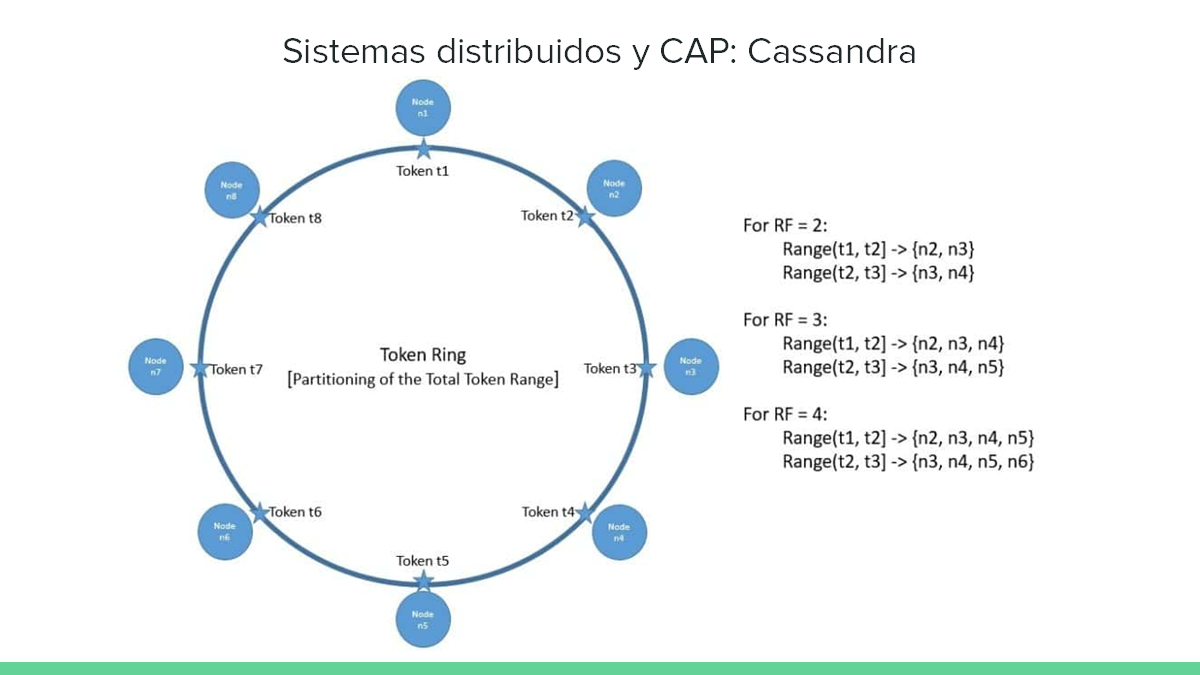

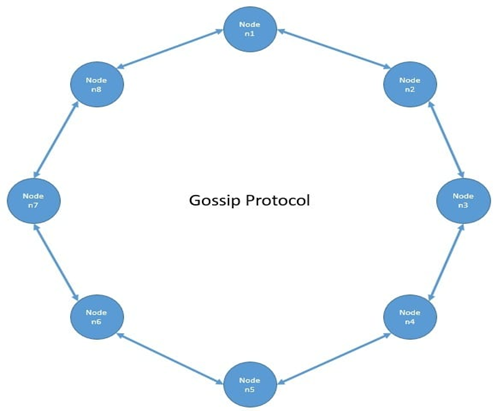

In [ ]:
from IPython.display import Image, display

# Muestra la primera imagen
display(Image('sistemas distribuidos casandra1.png'))

# Muestra la segunda imagen
display(Image('sistemas distribuidos casandra2.png'))


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Token Ring y Asignación de Tokens</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    code {
      background: #ecf0f1;
      padding: 2px 4px;
      border-radius: 3px;
      font-family: monospace;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table,
    body.dark-mode th,
    body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
    /* Filas zebra en tablas */
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }
    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Diseño responsivo */
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Token Ring y Asignación de Tokens</h1>

      <section>
        <h2>1. Inicialización del Token Ring</h2>
        <ul>
          <li>Crear un anillo hash con valores en el rango [0, 2<sup>m</sup> - 1] (normalmente m = 16 &rarr; 65536 tokens).</li>
          <li>Cada nodo recibe múltiples tokens distribuidos en el anillo.</li>
        </ul>
      </section>

      <section>
        <h2>2. Asignación de Tokens a los Nodos</h2>
        <ul>
          <li>Para cada nodo <code>N</code> en el clúster:
            <ol>
              <li>Calcular <code>token_N = HASH(NOMBRE_NODO)</code>.</li>
              <li>Insertar <code>token_N</code> en el Token Ring.</li>
              <li>Ordenar la lista de tokens en orden creciente.</li>
            </ol>
          </li>
        </ul>
      </section>

      <section>
        <h2>3. Asignación de Datos a los Nodos</h2>
        <ul>
          <li>Para cada clave <code>K</code> (registro, fila, etc.):
            <ol>
              <li>Calcular <code>token_K = HASH(CLAVE_K)</code>.</li>
              <li>Buscar el primer <code>token_N</code> en el anillo tal que <code>token_N ≥ token_K</code>.</li>
              <li>Asignar <code>CLAVE_K</code> al nodo correspondiente a <code>token_N</code>.</li>
            </ol>
          </li>
        </ul>
      </section>

      <section>
        <h2>4. Replicación de Datos</h2>
        <ul>
          <li>Para cada clave <code>K</code> almacenada en <code>NODO_PRINCIPAL</code>:
            <ol>
              <li>Definir el <span class="keyword">Factor de Replicación</span> (<code>RF</code>).</li>
              <li>Seleccionar los siguientes <code>RF - 1</code> nodos en el Token Ring.</li>
              <li>Replicar <code>CLAVE_K</code> en estos nodos.</li>
            </ol>
          </li>
        </ul>
      </section>

      <section>
        <h2>5. Manejo de Fallos y Redistribución</h2>
        <ul>
          <li>Si un nodo <code>N_f</code> falla:
            <ol>
              <li>Sus tokens y datos pasan a los nodos con los siguientes tokens en el anillo.</li>
              <li>Los nodos replicados asumen las consultas de los datos de <code>N_f</code>.</li>
            </ol>
          </li>
        </ul>
      </section>

      <section>
        <h2>6. Agregar o Eliminar Nodos</h2>
        <ul>
          <li>Si se agrega un nuevo nodo <code>N_nuevo</code>:
            <ol>
              <li>Se asignan nuevos tokens a <code>N_nuevo</code>.</li>
              <li>Algunos datos de los nodos cercanos en el anillo se reasignan a <code>N_nuevo</code>.</li>
            </ol>
          </li>
          <li>Si se elimina un nodo <code>N_removido</code>:
            <ol>
              <li>Sus tokens se eliminan del anillo.</li>
              <li>Sus datos son reasignados a los nodos más cercanos en el anillo.</li>
            </ol>
          </li>
        </ul>
      </section>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>


--- Tokens Asignados a Cada Nodo en el Anillo Hash ---
Token: 131 -> Nodo: Node_3
Token: 18327 -> Nodo: Node_1
Token: 24945 -> Nodo: Node_4
Token: 29383 -> Nodo: Node_2
Token: 36719 -> Nodo: Node_3
Token: 38011 -> Nodo: Node_4
Token: 38529 -> Nodo: Node_3
Token: 46339 -> Nodo: Node_2
Token: 52044 -> Nodo: Node_1
Token: 57683 -> Nodo: Node_2
Token: 60581 -> Nodo: Node_1
Token: 60695 -> Nodo: Node_4

--- Asignación de Datos en el Token Ring de Cassandra ---
Clave: Key_0 -> Token: 33728
 - Nodo Principal: Node_3
 - Réplicas: ['Node_3', 'Node_4', 'Node_3']
--------------------------------------------------
Clave: Key_1 -> Token: 56282
 - Nodo Principal: Node_2
 - Réplicas: ['Node_2', 'Node_1', 'Node_4']
--------------------------------------------------
Clave: Key_2 -> Token: 52395
 - Nodo Principal: Node_2
 - Réplicas: ['Node_2', 'Node_1', 'Node_4']
--------------------------------------------------
Clave: Key_3 -> Token: 60214
 - Nodo Principal: Node_1
 - Réplicas: ['Node_1', 'Node_4', 

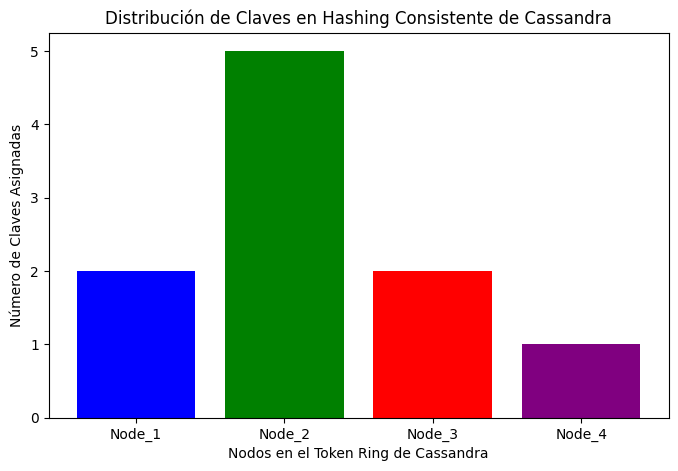

In [ ]:
# Reejecutar el código después del reinicio del estado
import hashlib
import bisect
import matplotlib.pyplot as plt

class TokenRingCassandra:
    def __init__(self, num_replicas=3):
        """Inicializa el anillo hash con réplicas"""
        self.num_replicas = num_replicas  # Número de réplicas por nodo
        self.ring = {}  # Diccionario de hash -> nodo
        self.sorted_keys = []  # Lista ordenada de tokens
        self.nodes = set()  # Conjunto de nodos

    def _hash(self, key):
        """Genera un token hash para la clave dada usando Murmur3 simulado."""
        return int(hashlib.md5(str(key).encode()).hexdigest(), 16) % (2**16)  # Simulación de Murmur3

    def add_node(self, node):
        """Añade un nodo al anillo hash con múltiples réplicas."""
        self.nodes.add(node)
        for i in range(self.num_replicas):
            hash_value = self._hash(f"{node}:{i}")  # Diferentes tokens para cada réplica
            self.ring[hash_value] = node
            bisect.insort(self.sorted_keys, hash_value)  # Mantiene ordenado el anillo

    def remove_node(self, node):
        """Elimina un nodo del anillo."""
        if node in self.nodes:
            self.nodes.remove(node)
            for i in range(self.num_replicas):
                hash_value = self._hash(f"{node}:{i}")
                self.ring.pop(hash_value, None)
                self.sorted_keys.remove(hash_value)

    def get_node(self, key):
        """Encuentra el nodo responsable de la clave dada."""
        if not self.ring:
            return None
        hash_value = self._hash(key)  # Genera el token del dato
        index = bisect.bisect(self.sorted_keys, hash_value) % len(self.sorted_keys)  # Busca el nodo más cercano
        return self.ring[self.sorted_keys[index]]

    def get_replicas(self, key):
        """Devuelve los nodos que almacenarán las réplicas del dato."""
        if not self.ring:
            return None
        hash_value = self._hash(key)
        index = bisect.bisect(self.sorted_keys, hash_value) % len(self.sorted_keys)

        # Se asignan réplicas a los siguientes nodos en el anillo
        replicas = []
        for i in range(self.num_replicas):
            replicas.append(self.ring[self.sorted_keys[(index + i) % len(self.sorted_keys)]])
        return replicas

# Crear el anillo hash simulando Cassandra
cassandra_ring = TokenRingCassandra(num_replicas=3)
nodes = ["Node_1", "Node_2", "Node_3", "Node_4"]
for node in nodes:
    cassandra_ring.add_node(node)

# Imprimir los tokens asignados a cada nodo
print("\n--- Tokens Asignados a Cada Nodo en el Anillo Hash ---")
for token in sorted(cassandra_ring.ring.keys()):
    print(f"Token: {token} -> Nodo: {cassandra_ring.ring[token]}")

# Generar claves (datos) y asignarlas a nodos con replicas
keys = [f"Key_{i}" for i in range(10)]  # 10 claves de prueba
assignments = {node: 0 for node in nodes}  # Contador de claves por nodo

# Imprimir paso a paso la asignación de datos
print("\n--- Asignación de Datos en el Token Ring de Cassandra ---")
for key in keys:
    primary_node = cassandra_ring.get_node(key)  # Nodo principal
    replicas = cassandra_ring.get_replicas(key)  # Nodos de replicación

    assignments[primary_node] += 1

    print(f"Clave: {key} -> Token: {cassandra_ring._hash(key)}")
    print(f" - Nodo Principal: {primary_node}")
    print(f" - Réplicas: {replicas}")
    print("-" * 50)

# Visualización de la distribución de claves en nodos
plt.figure(figsize=(8, 5))
plt.bar(assignments.keys(), assignments.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Nodos en el Token Ring de Cassandra")
plt.ylabel("Número de Claves Asignadas")
plt.title("Distribución de Claves en Hashing Consistente de Cassandra")
plt.show()


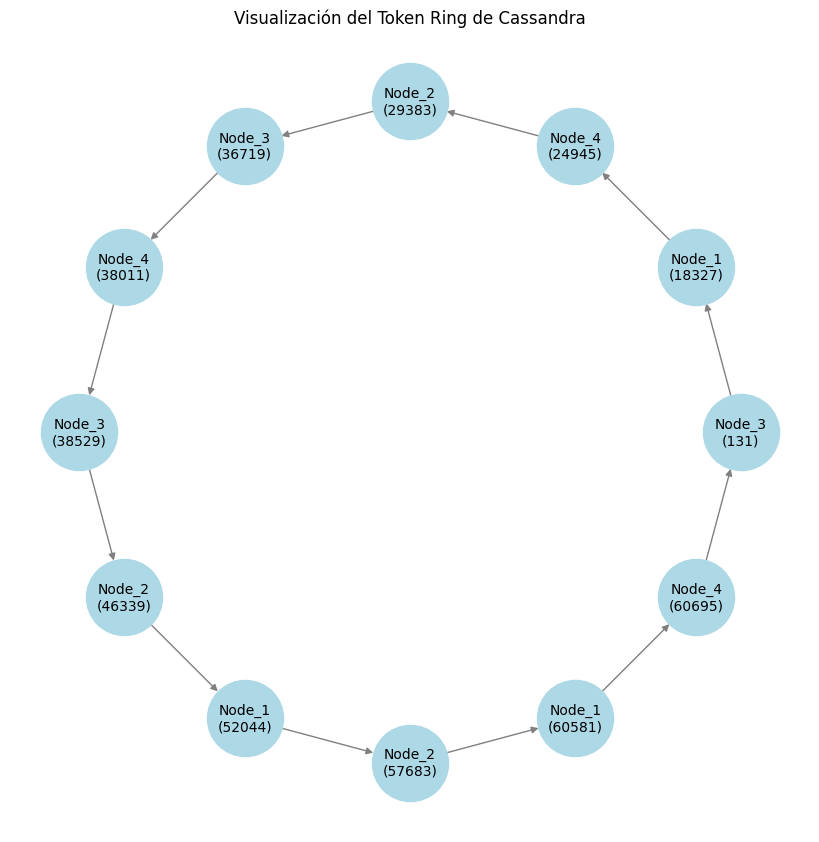

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo para representar el anillo hash
G = nx.DiGraph()

# Lista de tokens y nodos asignados (ordenados)
tokens_sorted = sorted(cassandra_ring.ring.keys())
nodes_assigned = [cassandra_ring.ring[token] for token in tokens_sorted]

# Añadir nodos al grafo
for i, token in enumerate(tokens_sorted):
    G.add_node(f"{nodes_assigned[i]}\n({token})")

# Conectar los nodos en forma de anillo
for i in range(len(tokens_sorted)):
    G.add_edge(f"{nodes_assigned[i]}\n({tokens_sorted[i]})",
               f"{nodes_assigned[(i + 1) % len(tokens_sorted)]}\n({tokens_sorted[(i + 1) % len(tokens_sorted)]})")

# Dibujar el grafo en un círculo
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Posicionar los nodos en círculo
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Visualización del Token Ring de Cassandra")
plt.show()


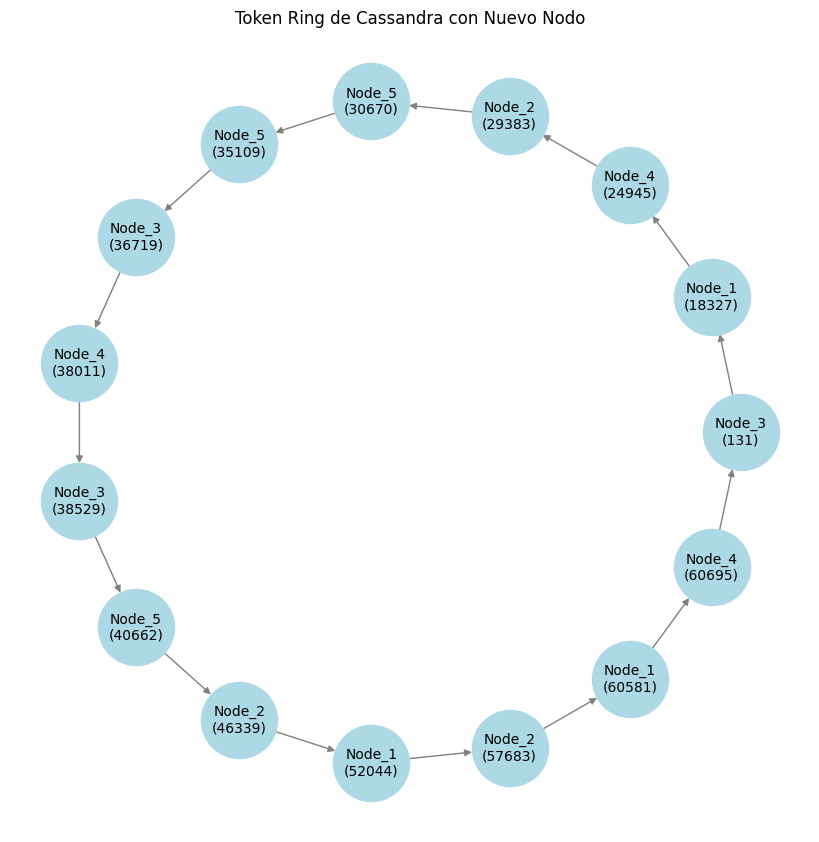

In [ ]:
# Agregar un nuevo nodo al anillo hash
new_node = "Node_5"
cassandra_ring.add_node(new_node)

# Volver a generar la visualización con el nuevo nodo
G = nx.DiGraph()

# Lista de tokens y nodos asignados (ordenados)
tokens_sorted = sorted(cassandra_ring.ring.keys())
nodes_assigned = [cassandra_ring.ring[token] for token in tokens_sorted]

# Añadir nodos al grafo
for i, token in enumerate(tokens_sorted):
    G.add_node(f"{nodes_assigned[i]}\n({token})")

# Conectar los nodos en forma de anillo
for i in range(len(tokens_sorted)):
    G.add_edge(f"{nodes_assigned[i]}\n({tokens_sorted[i]})",
               f"{nodes_assigned[(i + 1) % len(tokens_sorted)]}\n({tokens_sorted[(i + 1) % len(tokens_sorted)]})")

# Dibujar el grafo actualizado en un círculo
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Posicionar los nodos en círculo
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Token Ring de Cassandra con Nuevo Nodo")
plt.show()


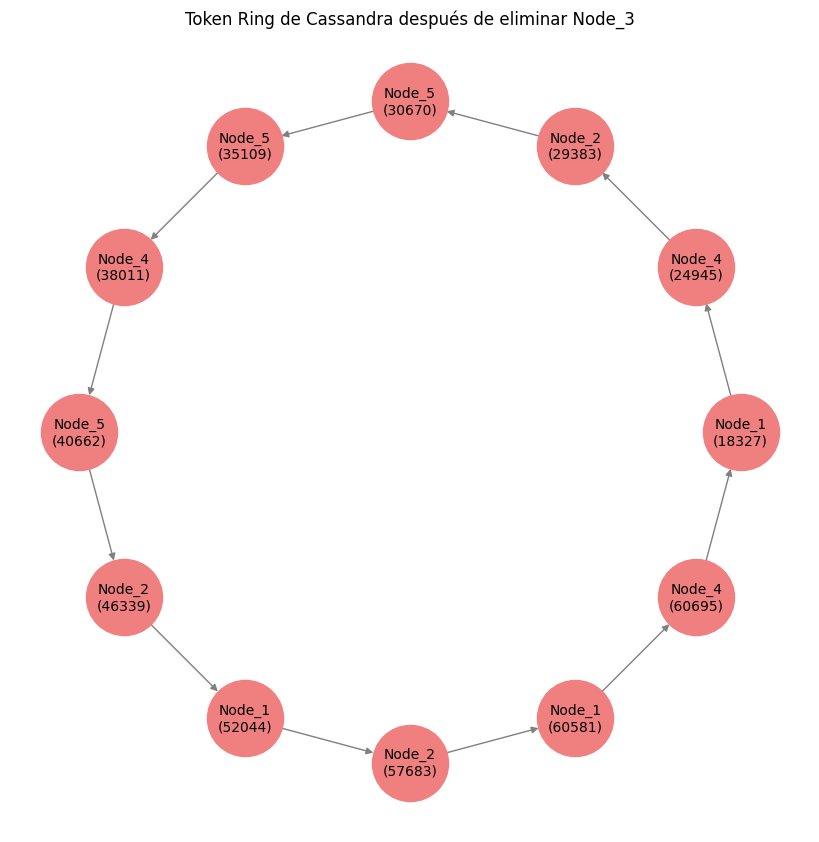

In [ ]:
# Eliminar un nodo del anillo hash
node_to_remove = "Node_3"
cassandra_ring.remove_node(node_to_remove)

# Volver a generar la visualización después de eliminar el nodo
G = nx.DiGraph()

# Lista de tokens y nodos asignados (ordenados)
tokens_sorted = sorted(cassandra_ring.ring.keys())
nodes_assigned = [cassandra_ring.ring[token] for token in tokens_sorted]

# Añadir nodos al grafo
for i, token in enumerate(tokens_sorted):
    G.add_node(f"{nodes_assigned[i]}\n({token})")

# Conectar los nodos en forma de anillo
for i in range(len(tokens_sorted)):
    G.add_edge(f"{nodes_assigned[i]}\n({tokens_sorted[i]})",
               f"{nodes_assigned[(i + 1) % len(tokens_sorted)]}\n({tokens_sorted[(i + 1) % len(tokens_sorted)]})")

# Dibujar el grafo actualizado en un círculo después de la eliminación del nodo
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Posicionar los nodos en círculo
nx.draw(G, pos, with_labels=True, node_color="lightcoral", edge_color="gray", node_size=3000, font_size=10)
plt.title(f"Token Ring de Cassandra después de eliminar {node_to_remove}")
plt.show()


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Relación entre Gossip y la Arquitectura Peer-to-Peer en Cassandra</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Diseño responsivo */
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos para listas anidadas */
    ul li ul {
      margin-top: 10px;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Relación entre Gossip y la Arquitectura Peer-to-Peer en Cassandra</h1>

      <p>
        En Cassandra, todos los nodos son iguales (arquitectura <span class="keyword">peer-to-peer</span>), lo que significa que cualquier nodo puede manejar solicitudes de lectura y escritura sin depender de un nodo central. El protocolo <span class="keyword">Gossip</span> es fundamental para mantener esta arquitectura eficiente.
      </p>

      <h2>Cómo Gossip facilita el modelo Peer-to-Peer:</h2>
      <ul>
        <li><strong>Descubrimiento de nodos:</strong> Gossip permite que los nuevos nodos descubran automáticamente otros nodos en el clúster y obtengan información sobre la distribución de datos.</li>
        <li><strong>Monitoreo del estado de los nodos:</strong> Cada nodo mantiene información actualizada sobre la disponibilidad de los demás, detectando fallos o desconexiones sin depender de un nodo central.</li>
        <li><strong>Sincronización de metadatos:</strong> Los nodos sincronizan información sobre particiones, estados de datos y cambios en la configuración sin requerir coordinación centralizada.</li>
        <li><strong>Escalabilidad horizontal:</strong> Gracias a Gossip, Cassandra puede agregar nuevos nodos sin necesidad de reconfiguración manual, permitiendo un crecimiento dinámico del clúster.</li>
      </ul>

      <h2>Ejemplo del funcionamiento de Gossip en Cassandra</h2>
      <p>
        Un nodo de Cassandra inicia su ciclo de Gossip y selecciona tres nodos aleatorios en el clúster con los que intercambiar información. Cada nodo comparte información sobre:
      </p>
      <ul>
        <li>Estado de los nodos activos o caídos.</li>
        <li>Cambios en la topología del clúster.</li>
        <li>Carga de datos y capacidad de almacenamiento.</li>
      </ul>
      <p>
        Los nodos que reciben esta información la almacenan y la propagan en sus siguientes ciclos de Gossip. Con el tiempo, la información llega a todos los nodos sin necesidad de un controlador central.
      </p>

      <h2>Ventajas del protocolo Gossip en Cassandra</h2>
      <ul>
        <li> <span class="keyword">Alta disponibilidad:</span> Cassandra sigue operando incluso si varios nodos fallan, ya que la información sobre fallos se propaga rápidamente.</li>
        <li> <span class="keyword">Resistencia a particiones de red:</span> Cada nodo toma decisiones basadas en la información que recibe, lo que evita interrupciones en la base de datos.</li>
        <li> <span class="keyword">Baja latencia:</span> Gossip reduce la necesidad de coordinación global, lo que mejora la rapidez en las actualizaciones del estado del clúster.</li>
        <li> <span class="keyword">Escalabilidad automática:</span> Cassandra puede crecer dinámicamente sin afectar el rendimiento general, ya que los nuevos nodos se integran fácilmente.</li>
      </ul>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

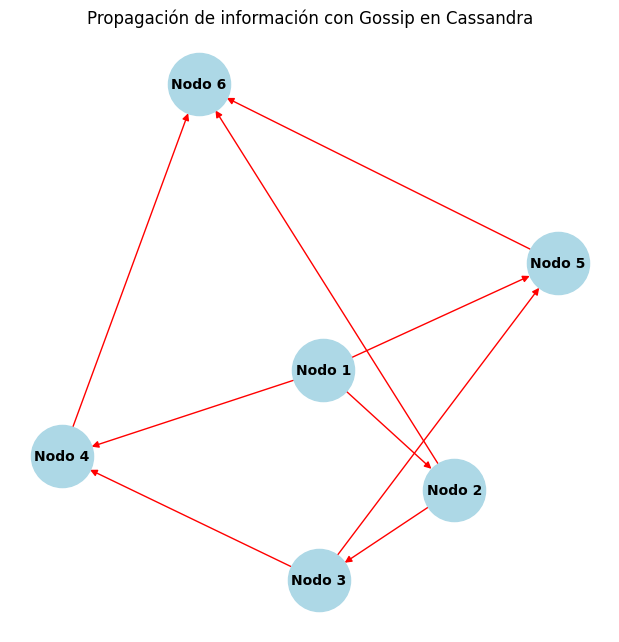

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo para representar los nodos de Cassandra y la propagación de Gossip
G = nx.DiGraph()

# Definir nodos en el clúster
nodes = ["Nodo 1", "Nodo 2", "Nodo 3", "Nodo 4", "Nodo 5", "Nodo 6"]

# Agregar nodos al grafo
G.add_nodes_from(nodes)

# Definir conexiones de Gossip entre nodos (aleatorias en cada ronda)
edges = [
    ("Nodo 1", "Nodo 2"), ("Nodo 1", "Nodo 4"), ("Nodo 1", "Nodo 5"),
    ("Nodo 2", "Nodo 3"), ("Nodo 2", "Nodo 6"), ("Nodo 3", "Nodo 4"),
    ("Nodo 3", "Nodo 5"), ("Nodo 4", "Nodo 6"), ("Nodo 5", "Nodo 6"),
]

# Agregar conexiones al grafo
G.add_edges_from(edges)

# Dibujar el grafo
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # Posicionamiento automático
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=2000, font_size=10, font_weight='bold')
plt.title("Propagación de información con Gossip en Cassandra")
plt.show()


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Teorema CAP y Arquitecturas de Bases de Datos</title>
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
      line-height: 1.8;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>La imposibilidad de tener las tres propiedades a la vez</h1>
      <p>
        El teorema CAP establece que un sistema distribuido no puede garantizar simultáneamente
        <span class="keyword">consistencia</span>,
        <span class="keyword">disponibilidad</span> y
        <span class="keyword">tolerancia a particiones</span>. Se debe elegir dos de estas tres propiedades, lo que implica diferentes tipos de arquitecturas de bases de datos.
      </p>
      <h2>1. CP (Consistencia + Tolerancia a Particiones, pero sin Alta Disponibilidad)</h2>
      <p>
        Se prioriza la coherencia de los datos y la tolerancia a fallos de red, pero algunas solicitudes pueden no ser respondidas.
      </p>
      <ul>
        <li><strong>Ejemplo:</strong> En una partición de red, si un nodo no puede comunicarse con otros, se bloquea para evitar inconsistencias.</li>
        <li><strong>Ejemplo de base de datos CP:</strong> HBase, Google Bigtable, MongoDB (modo fuerte de consistencia).</li>
      </ul>
      <h2>2. AP (Alta Disponibilidad + Tolerancia a Particiones, pero sin Fuerte Consistencia)</h2>
      <p>
        Se prioriza que el sistema siempre responda, incluso si hay fallos de comunicación, pero los datos pueden estar desactualizados en algunos nodos.
      </p>
      <ul>
        <li><strong>Ejemplo:</strong> Un nodo desconectado seguirá aceptando solicitudes y las actualizará cuando la conexión se recupere.</li>
        <li><strong>Ejemplo de base de datos AP:</strong> Cassandra, Riak, CouchDB.</li>
      </ul>
      <h2>3. CA (Consistencia + Alta Disponibilidad, pero sin Tolerancia a Particiones)</h2>
      <p>
        Se garantiza que todos los nodos siempre tengan los mismos datos y el sistema siempre responda, pero si hay una partición en la red, el sistema deja de funcionar. Esto solo es posible en sistemas no distribuidos o en aquellos con una infraestructura de red totalmente confiable.
      </p>
      <ul>
        <li><strong>Ejemplo de base de datos CA:</strong> Sistemas tradicionales como MySQL en una sola máquina, sistemas centralizados.</li>
      </ul>
      <h2>Ejemplo práctico del Teorema CAP</h2>
      <p>
        Imagina que tienes una aplicación de banca en línea. Si tu sistema sigue una de estas arquitecturas:
      </p>
      <ul>
        <li><strong>CP:</strong> Siempre que hagas una transferencia, los datos estarán actualizados en todos los nodos, pero si hay una falla en la red, es posible que el sistema rechace transacciones en lugar de permitir inconsistencias.</li>
        <li><strong>AP:</strong> Si la red falla, aún podrás realizar transacciones, pero algunos nodos pueden mostrar un saldo incorrecto hasta que la comunicación se restablezca.</li>
        <li><strong>CA:</strong> Los datos siempre estarán sincronizados y accesibles, pero si hay una partición de red, la aplicación dejará de funcionar hasta que la red se recupere.</li>
      </ul>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

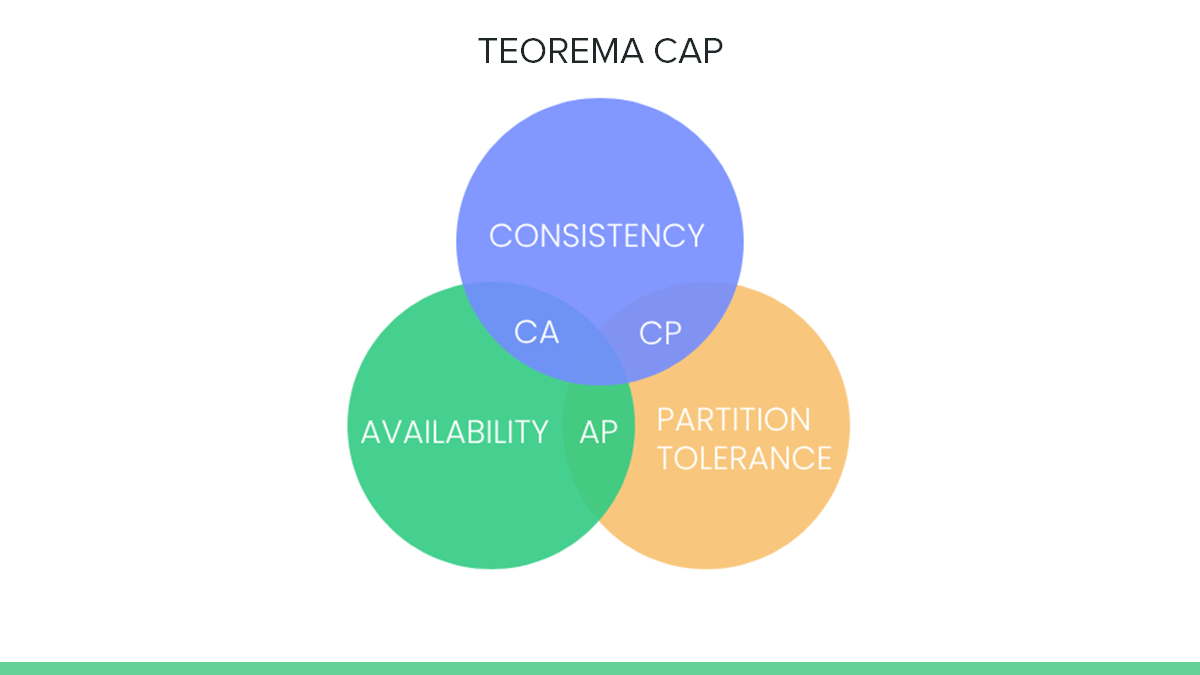

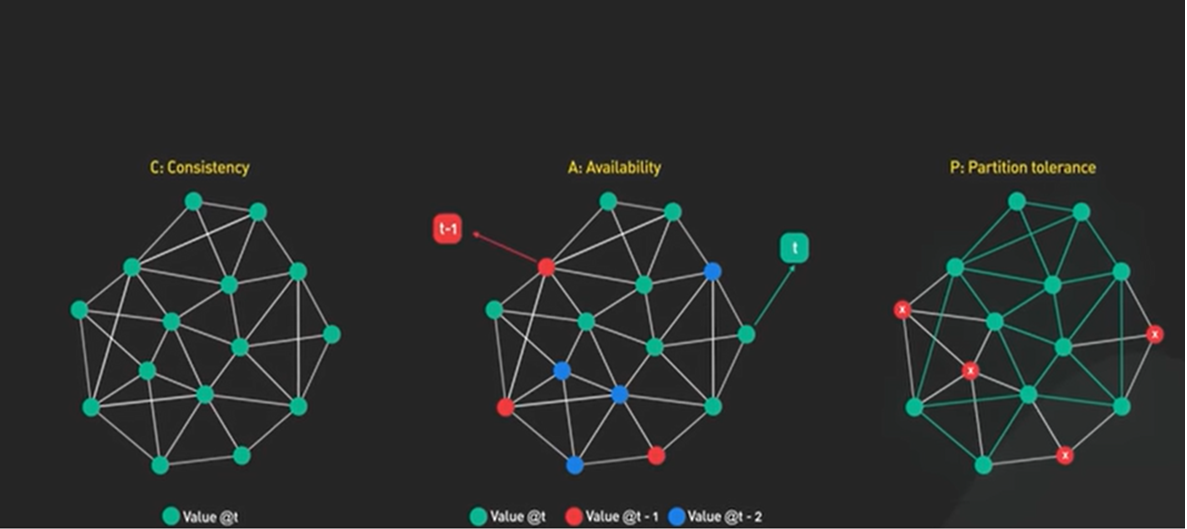

In [ ]:
from IPython.display import Image, display

# Mostrar la primera imagen
display(Image('teorema cap.png'))

# Mostrar la segunda imagen
display(Image('teorema cap2.png'))


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Cómo se aplica el Teorema CAP en bancos, redes sociales y Bitcoin</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Cómo se aplica el Teorema CAP en bancos, redes sociales y Bitcoin</h1>
      <p>
        El Teorema CAP establece que un sistema distribuido no puede garantizar simultáneamente
        <span class="keyword">consistencia (C)</span>,
        <span class="keyword">disponibilidad (A)</span> y
        <span class="keyword">tolerancia a particiones (P)</span>. Dependiendo del caso de uso, diferentes industrias eligen
        <span class="keyword">sacrificar</span> una de estas propiedades en favor de las otras dos. A continuación, analizamos cómo esto se aplica en
        <span class="keyword">bancos, redes sociales y Bitcoin</span>.
      </p>
      <hr>
      <h2>1. Bancos: Se sacrifica la disponibilidad (Modelo CP)</h2>
      <p>
        Los sistemas bancarios priorizan <span class="keyword">consistencia (C)</span> y <span class="keyword">tolerancia a particiones (P)</span>. En este contexto, es
        <span class="keyword">crucial que los datos sean precisos y coherentes en todo momento</span>. No puede permitirse que dos usuarios vean diferentes saldos en sus cuentas o que una misma cantidad de dinero se gaste dos veces debido a una inconsistencia.
      </p>
      <p>
        Por esta razón, cuando hay fallos de red o particiones en el sistema, muchas transacciones pueden
        <span class="keyword">ser rechazadas o retrasadas</span> en lugar de permitir que el sistema funcione con datos incorrectos. Por ello, en ocasiones, cuando intentas hacer una transferencia y hay problemas técnicos, la transacción no se procesa de inmediato o el sistema queda inoperativo temporalmente.
      </p>
      <p><strong>Ejemplo en la práctica:</strong></p>
      <ul>
        <li>Si un banco tiene una falla en sus servidores, puede bloquear operaciones hasta asegurarse de que todas las transacciones se registren correctamente en todos los nodos.</li>
        <li>Base de datos típica: <span class="keyword">Sistemas tradicionales como Oracle, MySQL con replicación fuerte o PostgreSQL en configuración de alta consistencia.</span></li>
      </ul>
      <hr>
      <h2>2. Redes Sociales: Se sacrifica la consistencia (Modelo AP)</h2>
      <p>
        Las redes sociales como <span class="keyword">Facebook, Twitter o Instagram</span> priorizan
        <span class="keyword">alta disponibilidad (A)</span> y <span class="keyword">tolerancia a particiones (P)</span> sobre la consistencia. Esto se debe a que es
        <span class="keyword">más importante que el sistema siga respondiendo rápidamente</span> a los usuarios, incluso si los datos no están completamente sincronizados en todos los servidores.
      </p>
      <p>
        Por ejemplo, si publicas un comentario y alguien lo ve con un pequeño retraso, no es crítico. Sin embargo, si el sistema se detiene porque está sincronizando datos, la experiencia se vería afectada.
      </p>
      <p>
        Se utiliza el concepto de <span class="keyword">"consistencia eventual"</span>, donde los datos pueden estar desfasados temporalmente, pero eventualmente todos los nodos se sincronizan.
      </p>
      <p><strong>Ejemplo en la práctica:</strong></p>
      <ul>
        <li>Si publicas una foto en Instagram, alguien en otra parte del mundo podría verla con unos segundos de retraso.</li>
        <li>Base de datos típica: <span class="keyword">Cassandra, DynamoDB, CouchDB (sistemas AP).</span></li>
      </ul>
      <hr>
      <h2>3. Bitcoin y Blockchain: Se sacrifica la disponibilidad (Modelo CP con tiempos de espera)</h2>
      <p>
        Bitcoin y otras blockchain priorizan <span class="keyword">consistencia (C)</span> y <span class="keyword">tolerancia a particiones (P)</span>, sacrificando disponibilidad (A) en algunos casos.
      </p>
      <p>
        En una red descentralizada como Bitcoin, <span class="keyword">todas las transacciones deben ser verificadas y añadidas a la blockchain de manera segura y consistente</span>. Cada nodo debe alcanzar un consenso antes de confirmar una transacción, lo que implica que el sistema no siempre es <span class="keyword">instantáneamente disponible</span> para escribir nuevas transacciones.
      </p>
      <p>
        En situaciones de alta congestión o problemas de comunicación, <span class="keyword">las transacciones pueden tardar varios minutos o incluso horas en confirmarse</span>. Esto es preferible a permitir inconsistencias, ya que en un sistema financiero basado en blockchain no se pueden registrar transacciones erróneas.
      </p>
      <p><strong>Ejemplo en la práctica:</strong></p>
      <ul>
        <li>Una transacción de Bitcoin puede tardar <span class="keyword">10 minutos o más</span> en confirmarse, pues cada nodo verifica la validez del bloque antes de añadirlo a la cadena.</li>
        <li>Base de datos utilizada: <span class="keyword">Blockchain, que funciona como un sistema distribuido con consenso.</span></li>
      </ul>
      <hr>
      <h2>Conclusión</h2>
      <p>
        El Teorema CAP influye en el diseño de sistemas distribuidos según sus necesidades:
      </p>
      <ul>
        <li><strong>Bancos (CP):</strong> Sacrifican disponibilidad para garantizar que el dinero no desaparezca o se duplique por inconsistencias.</li>
        <li><strong>Redes Sociales (AP):</strong> Sacrifican consistencia para asegurar que los usuarios siempre puedan interactuar sin demoras, aun si la información está momentáneamente desactualizada.</li>
        <li><strong>Bitcoin (CP con tiempos de espera):</strong> Sacrifica disponibilidad para asegurar que todas las transacciones se verifiquen y almacenen de forma inmutable en la blockchain.</li>
      </ul>
      <p>
        Cada enfoque responde a diferentes necesidades comerciales y técnicas, demostrando que
        <span class="keyword">no existe una única solución perfecta para todos los sistemas distribuidos</span>.
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Diferentes combinaciones CAP en bases de datos</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Diferentes combinaciones CAP en bases de datos</h1>
      <p>
        Diferentes bases de datos priorizan distintas combinaciones de <span class="keyword">consistencia (C)</span>, <span class="keyword">disponibilidad (A)</span> y <span class="keyword">tolerancia a particiones (P)</span>. A continuación, explicaremos cada categoría y su impacto en el diseño de sistemas distribuidos.
      </p>
      <hr>
      <h2>1. CA (Consistencia + Disponibilidad, sin Tolerancia a Particiones)</h2>
      <p>
        Se garantizan respuestas consistentes y disponibles, pero el sistema deja de funcionar si ocurre una partición de red.
      </p>
      <p>
        Adecuado para bases de datos centralizadas o con redes confiables.
      </p>
      <p>
        <strong>Ejemplo:</strong> Sistemas RDBMS tradicionales (Relational Database Management Systems) como MySQL, PostgreSQL, Oracle DB en configuraciones monolíticas.
      </p>
      <p>
        <strong>Uso típico:</strong> Aplicaciones empresariales en entornos controlados donde la partición de red es poco probable.
      </p>
      <p>
        <strong>Ejemplo en la vida real:</strong><br>
        Una empresa con un servidor único para gestionar empleados y nóminas puede usar una base de datos CA porque la red interna es altamente confiable. En caso de un fallo de red, los usuarios no podrán acceder al sistema, pero los datos seguirán siendo consistentes.
      </p>
      <hr>
      <h2>2. CP (Consistencia + Tolerancia a Particiones, sin Alta Disponibilidad)</h2>
      <p>
        Se garantiza que los datos sean siempre consistentes, incluso si hay fallos de red, pero a costa de la disponibilidad.
      </p>
      <p>
        Si una partición de red impide que un nodo reciba actualizaciones, puede rechazar solicitudes hasta que se recupere la conectividad.
      </p>
      <p>
        <strong>Ejemplo de bases de datos CP:</strong> MongoDB, HBase, Redis (cuando se configura para fuerte consistencia).
      </p>
      <p>
        <strong>Uso típico:</strong> Sistemas financieros y bancarios donde la precisión de los datos es más importante que la respuesta inmediata.
      </p>
      <p>
        <strong>Ejemplo en la vida real:</strong><br>
        Si estás haciendo una transferencia bancaria y la conexión con el servidor se pierde, el sistema puede bloquear temporalmente la operación en lugar de arriesgarse a procesar un pago duplicado.
      </p>
      <hr>
      <h2>3. AP (Alta Disponibilidad + Tolerancia a Particiones, sin Fuerte Consistencia)</h2>
      <p>
        El sistema sigue respondiendo a solicitudes aunque la red falle, pero algunos nodos pueden mostrar datos desactualizados hasta que se sincronicen.
      </p>
      <p>
        Se usa en sistemas donde la rapidez es más importante que la exactitud inmediata.
      </p>
      <p>
        <strong>Ejemplo de bases de datos AP:</strong> CouchDB, Cassandra, DynamoDB, Riak.
      </p>
      <p>
        <strong>Uso típico:</strong> Redes sociales, sistemas de mensajería y caches distribuidas.
      </p>
      <p>
        <strong>Ejemplo en la vida real:</strong><br>
        En una red social como Instagram o Twitter, si publicas un comentario, algunos usuarios pueden verlo inmediatamente, mientras que otros pueden verlo con un pequeño retraso debido a la propagación eventual de datos entre los servidores.
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Google Spanner: Base de datos distribuida con consistencia global</title>
  <!-- Carga asíncrona de MathJax -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
    tbody tr:nth-child(odd) {
      background-color: #f9f9f9;
    }
    body.dark-mode tbody tr:nth-child(odd) {
      background-color: #3b5360;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Google Spanner: Base de datos distribuida con consistencia global</h1>
      <p>
        Google Spanner es una base de datos relacional distribuida desarrollada por Google, diseñada para escalar horizontalmente sin sacrificar la <span class="keyword">consistencia fuerte</span>. Es una de las pocas bases de datos que desafía el Teorema CAP al ofrecer <span class="keyword">consistencia fuerte (C)</span>, <span class="keyword">alta disponibilidad (A)</span> y <span class="keyword">tolerancia a particiones (P)</span> simultáneamente, algo que tradicionalmente no es posible en sistemas distribuidos convencionales.
      </p>
      <hr>
      <h2>Características principales de Google Spanner</h2>
      <ul>
        <li><strong>Base de datos distribuida y escalable:</strong> A diferencia de bases de datos relacionales tradicionales como MySQL o PostgreSQL, Spanner está diseñado para operar a gran escala en múltiples centros de datos globales. Puede manejar millones de transacciones por segundo sin perder consistencia.</li>
        <li><strong>Consistencia fuerte a nivel global:</strong> Utiliza un mecanismo llamado <span class="keyword">TrueTime</span> que le permite mantener la consistencia ACID en múltiples regiones del mundo. A diferencia de sistemas NoSQL como Cassandra o DynamoDB, donde la consistencia es eventual, en Spanner las transacciones están totalmente sincronizadas en todos los nodos.</li>
        <li><strong>Uso de relojes atómicos y GPS para sincronización:</strong> Spanner usa la tecnología TrueTime, que combina relojes atómicos y de GPS en los centros de datos de Google para garantizar una mínima incertidumbre en la sincronización de transacciones. Esto evita problemas de concurrencia y permite transacciones distribuidas con tiempos de confirmación predecibles.</li>
        <li><strong>Alta disponibilidad y tolerancia a fallos:</strong> Gracias a su arquitectura distribuida, si un centro de datos falla, otro nodo en una región diferente puede seguir procesando solicitudes sin afectar la disponibilidad del sistema. Además, realiza replicación automática de datos para evitar la pérdida de información.</li>
        <li><strong>Compatibilidad con SQL:</strong> A diferencia de muchas bases de datos NoSQL, Spanner soporta SQL, lo que facilita la migración desde bases de datos relacionales tradicionales. Ofrece transacciones ACID a gran escala, algo que las bases de datos NoSQL no suelen garantizar.</li>
      </ul>
      <hr>
      <h2>¿Dónde se usa Google Spanner?</h2>
      <p>
        Spanner es utilizado por empresas que necesitan manejar grandes volúmenes de datos a nivel global, sin sacrificar consistencia y con tiempos de respuesta mínimos. Algunos ejemplos de uso incluyen:
      </p>
      <ul>
        <li>Sistemas bancarios y financieros que requieren transacciones altamente confiables.</li>
        <li>Plataformas de comercio electrónico globales que manejan inventarios en múltiples países.</li>
        <li>Juegos en línea y aplicaciones en la nube que requieren sincronización de datos en todo el mundo.</li>
      </ul>
      <hr>
      <h2>¿Cómo encaja en el Teorema CAP?</h2>
      <p>
        Tradicionalmente, el Teorema CAP establece que un sistema distribuido solo puede garantizar dos de las tres propiedades (C, A o P). Sin embargo, Spanner logra mantener las tres mediante:
      </p>
      <ul>
        <li><strong>Consistencia (C):</strong> Garantiza que todas las lecturas y escrituras reflejan el estado más reciente de la base de datos.</li>
        <li><strong>Alta disponibilidad (A):</strong> Se replica globalmente para seguir funcionando en caso de fallos.</li>
        <li><strong>Tolerancia a particiones (P):</strong> Gracias a su uso de relojes atómicos, puede manejar fallos de red sin perder sincronización.</li>
      </ul>
      <hr>
      <h2>Comparación con otras bases de datos</h2>
      <table>
        <thead>
          <tr>
            <th>Base de datos</th>
            <th>Modelo CAP</th>
            <th>Consistencia</th>
            <th>Escalabilidad</th>
            <th>Transacciones ACID</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Google Spanner</td>
            <td>CA+P (Desafía CAP)</td>
            <td>Fuerte (global)</td>
            <td>Alta</td>
            <td>Sí</td>
          </tr>
          <tr>
            <td>MySQL/PostgreSQL</td>
            <td>CA</td>
            <td>Fuerte</td>
            <td>Baja</td>
            <td>Sí</td>
          </tr>
          <tr>
            <td>Cassandra</td>
            <td>AP</td>
            <td>Eventual</td>
            <td>Alta</td>
            <td>No</td>
          </tr>
          <tr>
            <td>MongoDB</td>
            <td>CP</td>
            <td>Fuerte (según configuración)</td>
            <td>Media</td>
            <td>Parcial</td>
          </tr>
          <tr>
            <td>DynamoDB</td>
            <td>AP</td>
            <td>Eventual</td>
            <td>Alta</td>
            <td>No</td>
          </tr>
        </tbody>
      </table>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Base de datos,Modelo CAP,Consistencia,Escalabilidad,Transacciones ACID
Google Spanner,CA+P (Desafía CAP),Fuerte (global),Alta,Sí
MySQL/PostgreSQL,CA,Fuerte,Baja,Sí
Cassandra,AP,Eventual,Alta,No
MongoDB,CP,Fuerte (según configuración),Media,Parcial
DynamoDB,AP,Eventual,Alta,No


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>¿Qué es ACID y cómo se relaciona con bases de datos?</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>¿Qué es ACID y cómo se relaciona con bases de datos?</h1>
      <p>
        El término <span class="keyword">ACID</span> representa un conjunto de propiedades esenciales para garantizar la integridad y confiabilidad de las transacciones en bases de datos. Se compone de cuatro principios fundamentales: <span class="keyword">Atomicidad (A)</span>, <span class="keyword">Consistencia (C)</span>, <span class="keyword">Aislamiento (I)</span> y <span class="keyword">Durabilidad (D)</span>.
      </p>
      <p>
        Las bases de datos <span class="keyword">relacionales (SQL)</span> y algunas bases de datos distribuidas implementan ACID para asegurar que todas las transacciones sean seguras, evitando errores y corrupciones en los datos.
      </p>
      <hr>
      <h2>Propiedades de ACID</h2>
      <h3>1. Atomicidad (Atomicity)</h3>
      <ul>
        <li><strong>Principio:</strong> Una transacción es <span class="keyword">todo o nada</span>. Si alguna parte de la transacción falla, la base de datos revierte todos los cambios previos.</li>
        <li><strong>Ejemplo:</strong> En una transferencia bancaria de $100 entre dos cuentas, si se debita el dinero pero ocurre un error antes de acreditarlo, la operación se cancela y no se pierde dinero.</li>
      </ul>
      <h3>2. Consistencia (Consistency)</h3>
      <ul>
        <li><strong>Principio:</strong> La base de datos <span class="keyword">siempre pasa de un estado válido a otro estado válido</span>.</li>
        <li><strong>Ejemplo:</strong> En un sistema de inventario, no se debe permitir vender un producto si su cantidad en stock es <span class="keyword">cero</span>. Si una transacción intenta hacerlo, será rechazada para mantener la integridad de los datos.</li>
      </ul>
      <h3>3. Aislamiento (Isolation)</h3>
      <ul>
        <li><strong>Principio:</strong> Múltiples transacciones pueden ejecutarse simultáneamente sin afectar su correcto funcionamiento.</li>
        <li><strong>Ejemplo:</strong> Si dos usuarios intentan comprar el <span class="keyword">último boleto de avión</span>, la base de datos debe garantizar que solo uno de ellos logre completar la transacción, evitando condiciones de carrera.</li>
      </ul>
      <h3>4. Durabilidad (Durability)</h3>
      <ul>
        <li><strong>Principio:</strong> Una vez que una transacción se confirma, sus datos quedan guardados permanentemente, incluso si hay fallos en el sistema.</li>
        <li><strong>Ejemplo:</strong> Si un sistema de compras en línea confirma un pedido y luego el servidor se apaga, el pedido debe seguir registrado cuando el sistema vuelva a funcionar.</li>
      </ul>
      <hr>
      <h2>Relación entre ACID y bases de datos</h2>
      <p>
        Las bases de datos implementan ACID para garantizar <span class="keyword">seguridad, confiabilidad y precisión en las transacciones</span>. Dependiendo del tipo de base de datos, el soporte de ACID puede variar:
      </p>
      <h3>1. Bases de datos SQL (Relacionales)</h3>
      <p>
        Las bases de datos como <span class="keyword">MySQL, PostgreSQL, Oracle y SQL Server</span> siguen ACID estrictamente. Son ideales para <span class="keyword">bancos, sistemas financieros y aplicaciones críticas</span>, donde la integridad de los datos es más importante que la velocidad.
      </p>
      <table>
        <thead>
          <tr>
            <th>Base de datos SQL</th>
            <th>Soporte ACID</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>MySQL</td>
            <td>✅ Sí</td>
          </tr>
          <tr>
            <td>PostgreSQL</td>
            <td>✅ Sí</td>
          </tr>
          <tr>
            <td>Oracle Database</td>
            <td>✅ Sí</td>
          </tr>
          <tr>
            <td>Microsoft SQL Server</td>
            <td>✅ Sí</td>
          </tr>
        </tbody>
      </table>
      <h3>2. Bases de datos NoSQL</h3>
      <p>
        Muchas bases de datos NoSQL no implementan ACID completamente porque priorizan <span class="keyword">escalabilidad y disponibilidad</span> en sistemas distribuidos. Sin embargo, algunas pueden ofrecer ACID en ciertos casos.
      </p>
      <table>
        <thead>
          <tr>
            <th>Base de datos NoSQL</th>
            <th>Soporte ACID</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>MongoDB (con transacciones)</td>
            <td>✅ Parcial</td>
          </tr>
          <tr>
            <td>Cassandra</td>
            <td>❌ No (Eventual)</td>
          </tr>
          <tr>
            <td>DynamoDB</td>
            <td>❌ No (Eventual)</td>
          </tr>
          <tr>
            <td>Google Spanner</td>
            <td>✅ Sí (Distribuido)</td>
          </tr>
        </tbody>
      </table>
      <hr>
      <h2>¿Por qué algunas bases de datos sacrifican ACID?</h2>
      <ul>
        <li><strong>Escalabilidad:</strong> ACID puede limitar el rendimiento en sistemas con millones de transacciones simultáneas.</li>
        <li><strong>Disponibilidad:</strong> En sistemas distribuidos, priorizar consistencia fuerte puede hacer que algunos nodos rechacen solicitudes.</li>
        <li><strong>Tiempo de respuesta:</strong> ACID puede introducir retardos en operaciones críticas, como en redes sociales o videojuegos en línea.</li>
      </ul>
      <hr>
      <h2>Conclusión</h2>
      <p>
        Las propiedades <span class="keyword">ACID</span> garantizan la confiabilidad de las bases de datos, asegurando que las transacciones sean atómicas, consistentes, aisladas y duraderas. Mientras que las <span class="keyword">bases de datos SQL</span> siguen ACID estrictamente, muchas <span class="keyword">bases de datos NoSQL</span> lo relajan en favor de rendimiento y escalabilidad. La elección entre una base de datos <span class="keyword">ACID o no-ACID</span> depende de la aplicación y de las necesidades del negocio.
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Base de datos SQL,Soporte ACID
MySQL,✅ Sí
PostgreSQL,✅ Sí
Oracle Database,✅ Sí
Microsoft SQL Server,✅ Sí
Base de datos NoSQL,Soporte ACID
MongoDB (con transacciones),✅ Parcial
Cassandra,❌ No (Eventual)
DynamoDB,❌ No (Eventual)
Google Spanner,✅ Sí (Distribuido)


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>¿Están relacionados CAP y ACID?</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>¿Están relacionados CAP y ACID?</h1>
      <p>
        Sí, <span class="keyword">CAP</span> y <span class="keyword">ACID</span> están relacionados, pero abordan <span class="keyword">aspectos diferentes</span> de los sistemas de bases de datos distribuidas.
      </p>
      <ul>
        <li><strong>CAP:</strong> Se enfoca en los <span class="keyword">sistemas distribuidos</span> y la elección entre <span class="keyword">consistencia, disponibilidad y tolerancia a particiones</span>.</li>
        <li><strong>ACID:</strong> Se enfoca en la <span class="keyword">gestión de transacciones</span> dentro de una base de datos, asegurando su <span class="keyword">fiabilidad e integridad</span>.</li>
      </ul>
      <p>
        Aunque son conceptos distintos, <span class="keyword">se influencian entre sí</span>, ya que la elección de un modelo CAP puede afectar la capacidad de una base de datos para cumplir con ACID.
      </p>
      <hr>
      <h2>1. Comparación entre CAP y ACID</h2>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>ACID (Integridad de transacciones)</th>
            <th>CAP (Bases de datos distribuidas)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Objetivo</strong></td>
            <td>Garantizar que las transacciones sean confiables y seguras</td>
            <td>Manejar la consistencia, disponibilidad y fallos en sistemas distribuidos</td>
          </tr>
          <tr>
            <td><strong>Alcance</strong></td>
            <td>Aplicado a <span class="keyword">bases de datos individuales o distribuidas</span></td>
            <td>Aplicado a <span class="keyword">sistemas distribuidos</span> (varios nodos, múltiples regiones)</td>
          </tr>
          <tr>
            <td><strong>Consistencia</strong></td>
            <td>Fuerte, los datos deben ser correctos en todo momento</td>
            <td>Puede ser fuerte o eventual, dependiendo de la elección CAP</td>
          </tr>
          <tr>
            <td><strong>Escalabilidad</strong></td>
            <td>Puede ser limitada por transacciones sincronizadas</td>
            <td>Diseñado para grandes volúmenes de datos</td>
          </tr>
          <tr>
            <td><strong>Disponibilidad</strong></td>
            <td>Puede bloquearse para garantizar consistencia</td>
            <td>Puede sacrificar consistencia para responder más rápido</td>
          </tr>
        </tbody>
      </table>
      <hr>
      <h2>2. ¿Cómo afecta CAP a ACID?</h2>
      <p>
        En un sistema distribuido, cumplir con <span class="keyword">ACID</span> depende de qué principio de CAP prioriza la base de datos.
      </p>
      <h3>1. Bases de datos CP (Consistencia + Tolerancia a Particiones) → ACID Fuerte</h3>
      <ul>
        <li><strong>Ejemplo:</strong> Google Spanner, MongoDB (modo fuerte), HBase</li>
        <li><strong>Efecto en ACID:</strong> Pueden garantizar consistencia fuerte y transacciones ACID, pero sacrifican disponibilidad en caso de fallos.</li>
        <li><strong>Ejemplo práctico:</strong> Un sistema bancario debe ser consistente y tolerante a fallos, pero puede rechazar operaciones si no puede garantizar integridad.</li>
      </ul>
      <h3>2. Bases de datos AP (Alta Disponibilidad + Tolerancia a Particiones) → ACID Relajado</h3>
      <ul>
        <li><strong>Ejemplo:</strong> Cassandra, DynamoDB, CouchDB</li>
        <li><strong>Efecto en ACID:</strong> No cumplen con ACID en su totalidad, ya que priorizan rendimiento y disponibilidad sobre la consistencia fuerte.</li>
        <li><strong>Ejemplo práctico:</strong> En redes sociales como TikTok o Instagram, los datos deben estar siempre disponibles, pero no es crítico que cada nodo tenga la misma versión de los datos en tiempo real.</li>
      </ul>
      <h3>3. Bases de datos CA (Consistencia + Alta Disponibilidad) → ACID Fuerte pero no distribuidas</h3>
      <ul>
        <li><strong>Ejemplo:</strong> MySQL, PostgreSQL (modo tradicional)</li>
        <li><strong>Efecto en ACID:</strong> Cumplen ACID porque no son completamente distribuidas y dependen de una única fuente de datos.</li>
        <li><strong>Ejemplo práctico:</strong> Un sistema de facturación necesita transacciones 100% consistentes y siempre accesibles, pero si la red falla, el sistema se detiene.</li>
      </ul>
      <hr>
      <h2>3. Relación en la práctica: CAP vs ACID en bases de datos</h2>
      <p>
        Algunas bases de datos intentan balancear ACID y CAP según sus necesidades:
      </p>
      <table>
        <thead>
          <tr>
            <th>Base de datos</th>
            <th>Modelo CAP</th>
            <th>Cumple ACID?</th>
            <th>Uso típico</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Google Spanner</td>
            <td>CP + Alta Disponibilidad</td>
            <td>✅ Sí, globalmente</td>
            <td>Finanzas, e-commerce</td>
          </tr>
          <tr>
            <td>MySQL/PostgreSQL</td>
            <td>CA (No distribuido)</td>
            <td>✅ Sí, pero sin escalabilidad global</td>
            <td>ERP, CRM, bancos</td>
          </tr>
          <tr>
            <td>Cassandra/DynamoDB</td>
            <td>AP</td>
            <td>❌ No, prioriza disponibilidad</td>
            <td>Redes sociales, Big Data</td>
          </tr>
          <tr>
            <td>MongoDB (modo fuerte)</td>
            <td>CP</td>
            <td>✅ Parcialmente</td>
            <td>Aplicaciones híbridas</td>
          </tr>
        </tbody>
      </table>
      <hr>
      <h2>4. Conclusión</h2>
      <ul>
        <li><strong>ACID</strong> garantiza que las transacciones sean correctas y confiables, mientras que <strong>CAP</strong> define cómo los sistemas distribuidos manejan consistencia, disponibilidad y fallos.</li>
        <li>En bases de datos distribuidas, CAP impone limitaciones a ACID, obligando a elegir entre consistencia fuerte o escalabilidad y disponibilidad.</li>
        <li>Bases de datos como Spanner intentan equilibrar CAP y ACID, pero en general, no es posible garantizar ambas cosas al 100% sin compromisos.</li>
      </ul>
      <p>
        Si una empresa necesita transacciones seguras y consistencia fuerte, optará por un sistema CP (como Google Spanner). Si necesita alta disponibilidad y escalabilidad, elegirá un sistema AP (como Cassandra o DynamoDB), sacrificando ACID.
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


<IPython.core.display.Javascript object>

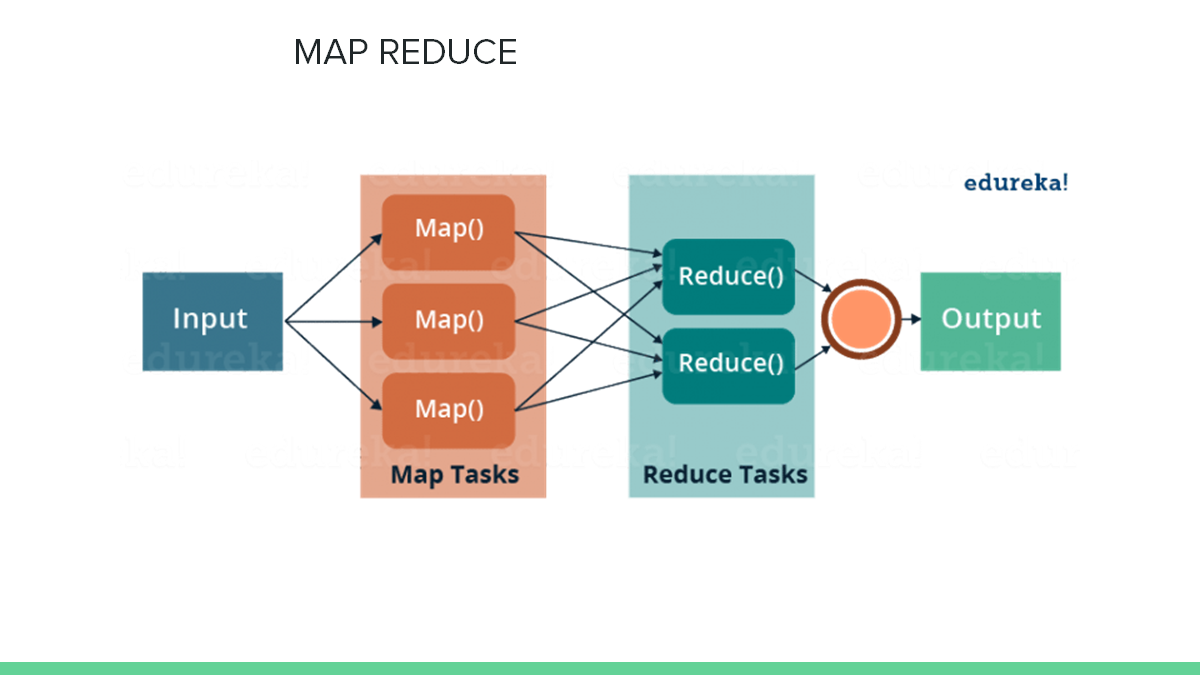

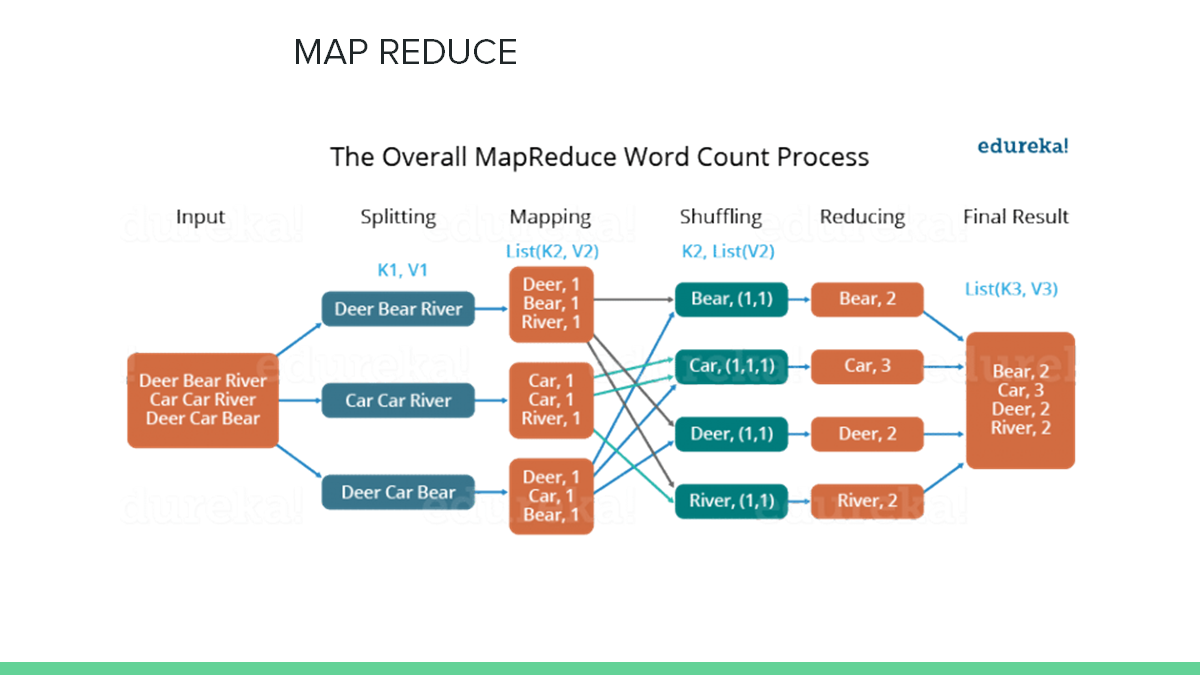

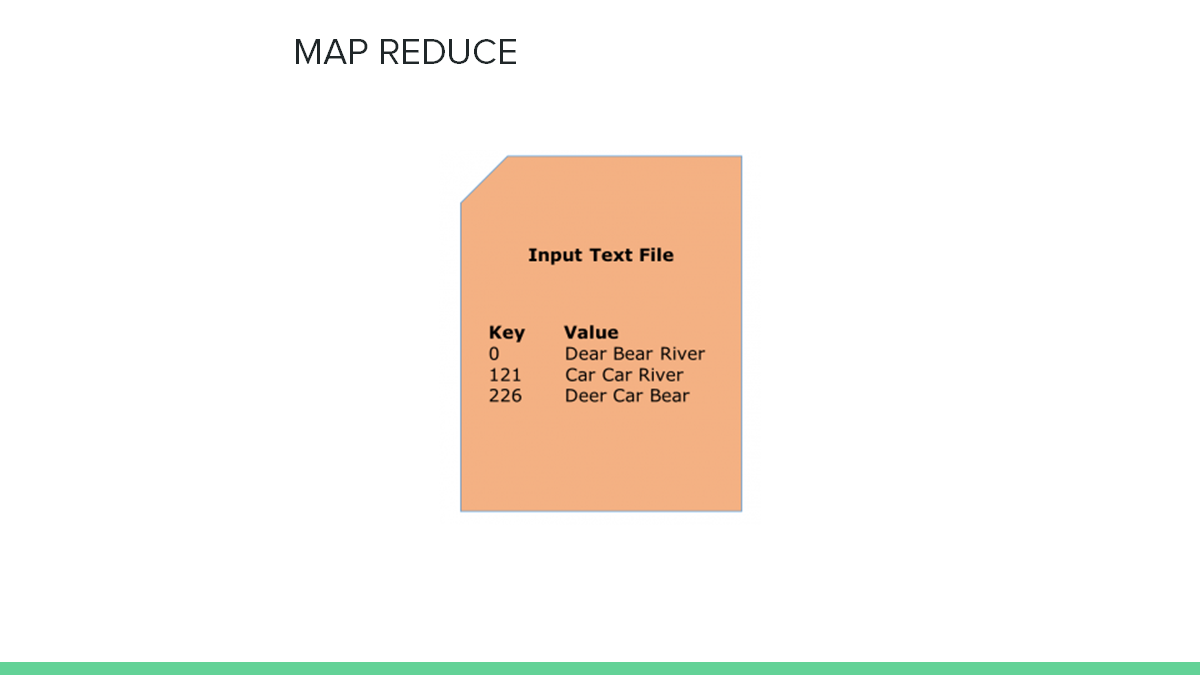

In [ ]:
from IPython.display import Image, display

# Muestra la primera imagen
display(Image('map1.png'))

# Muestra la segunda imagen
display(Image('map2.png'))

# Muestra la tercera imagen
display(Image('map3.png'))


In [ ]:
from collections import defaultdict
from multiprocessing import Pool

# Datos de entrada: lista de textos
documentos = [
    "map reduce es un modelo de procesamiento",
    "reduce funciona con map",
    "map y reduce se usan en big data",
    "big data usa hadoop y mapreduce"
]

# 1. MAP: Función para contar palabras en cada fragmento de texto
def map_function(texto):
    resultado = []
    for palabra in texto.split():
        resultado.append((palabra.lower(), 1))  # Emitimos (clave, valor)
    return resultado

# 2. SHUFFLE: Agrupamos los resultados por palabra
def shuffle(mapped_data):
    grouped_data = defaultdict(list)
    for key, value in mapped_data:
        grouped_data[key].append(value)
    return grouped_data

# 3. REDUCE: Sumamos los valores por palabra
def reduce_function(shuffled_data):
    reduced_data = {key: sum(values) for key, values in shuffled_data.items()}
    return reduced_data

# Ejecutamos Map en paralelo con multiprocessing
with Pool() as pool:
    mapped_results = pool.map(map_function, documentos)

# Aplanamos la lista de resultados de Map
flattened_mapped = [pair for sublist in mapped_results for pair in sublist]

# Aplicamos Shuffle
shuffled_results = shuffle(flattened_mapped)

# Aplicamos Reduce
final_result = reduce_function(shuffled_results)

# Mostramos el resultado final
print("\n--- Resultado Final de MapReduce ---")
for palabra, count in final_result.items():
    print(f"{palabra}: {count}")



--- Resultado Final de MapReduce ---
map: 3
reduce: 3
es: 1
un: 1
modelo: 1
de: 1
procesamiento: 1
funciona: 1
con: 1
y: 2
se: 1
usan: 1
en: 1
big: 2
data: 2
usa: 1
hadoop: 1
mapreduce: 1


In [ ]:
#ejemplo de power point
from collections import defaultdict
from multiprocessing import Pool

# 1. Datos de entrada (simulando archivos o documentos)
documentos = [
    "Deer Bear River",
    "Car Car River",
    "Deer Car Bear"
]

# 2. Función MAP: Genera pares (palabra, 1) para cada palabra en el texto
def map_function(texto):
    resultado = []
    for palabra in texto.split():
        resultado.append((palabra, 1))  # Emitimos (clave, valor)
    return resultado

# 3. Función SHUFFLE: Agrupa palabras iguales
def shuffle(mapped_data):
    grouped_data = defaultdict(list)
    for key, value in mapped_data:
        grouped_data[key].append(value)
    return grouped_data

# 4. Función REDUCE: Suma los valores agrupados por palabra
def reduce_function(shuffled_data):
    reduced_data = {key: sum(values) for key, values in shuffled_data.items()}
    return reduced_data

# Ejecutamos Map en paralelo con multiprocessing
with Pool() as pool:
    mapped_results = pool.map(map_function, documentos)

# Aplanamos la lista de resultados de Map
flattened_mapped = [pair for sublist in mapped_results for pair in sublist]

# Aplicamos Shuffle
shuffled_results = shuffle(flattened_mapped)

# Aplicamos Reduce
final_result = reduce_function(shuffled_results)

# Mostramos el resultado final
print("\n--- Resultado Final de MapReduce ---")
for palabra, count in final_result.items():
    print(f"{palabra}: {count}")



--- Resultado Final de MapReduce ---
Deer: 2
Bear: 2
River: 2
Car: 3


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Enfoque Tradicional vs. Enfoque MapReduce</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos para la tabla comparativa */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>Enfoque Tradicional vs. Enfoque MapReduce</h1>
      <p>
        Existen dos formas de procesar datos en un sistema distribuido:
      </p>
      <ul>
        <li><strong>Enfoque tradicional:</strong> Mover los datos hacia la unidad de procesamiento.</li>
        <li><strong>Enfoque MapReduce:</strong> Mover la unidad de procesamiento hacia los datos.</li>
      </ul>

      <hr>

      <h2>1. Enfoque Tradicional: Mover los datos hacia la unidad de procesamiento (Izquierda)</h2>
      <p>En este modelo:</p>
      <ul>
        <li>Todos los datos son enviados a un nodo maestro, que se encarga del procesamiento.</li>
        <li>Este nodo central realiza todos los cálculos y devuelve los resultados a los nodos esclavos.</li>
      </ul>
      <p><strong>Problemas:</strong></p>
      <ul>
        <li><span class="keyword">Cuello de botella:</span> Si el nodo maestro recibe demasiados datos, se vuelve un punto crítico de congestión.</li>
        <li><span class="keyword">Costos de transferencia de datos:</span> Enviar grandes volúmenes de datos a un solo punto consume ancho de banda y tiempo.</li>
        <li><span class="keyword">Fallo único:</span> Si el nodo maestro falla, todo el sistema se detiene.</li>
      </ul>
      <p><strong>🔴 Ejemplo real:</strong></p>
      <ul>
        <li>Un sistema de análisis que usa un solo servidor para procesar datos provenientes de múltiples fuentes, como registros de usuarios en un sitio web.</li>
        <li>Este modelo se usaba antes de la llegada de Big Data, cuando los volúmenes de datos eran pequeños y manejables.</li>
      </ul>

      <hr>

      <h2>2. Enfoque MapReduce: Mover el procesamiento hacia los datos (Derecha)</h2>
      <p>En este modelo:</p>
      <ul>
        <li>En lugar de enviar los datos al nodo maestro, cada nodo esclavo procesa su parte de los datos localmente.</li>
        <li>El nodo maestro solo coordina la ejecución, asegurando que los resultados de cada nodo sean combinados correctamente.</li>
      </ul>
      <p><strong>Ventajas:</strong></p>
      <ul>
        <li><span class="keyword">Menos transferencia de datos:</span> Cada nodo procesa su propia parte sin congestionar la red.</li>
        <li><span class="keyword">Escalabilidad:</span> Se pueden agregar más nodos sin afectar el rendimiento.</li>
        <li><span class="keyword">Mayor tolerancia a fallos:</span> Si un nodo falla, otro puede asumir su carga sin detener el sistema.</li>
      </ul>
      <p><strong>🔵 Ejemplo real:</strong></p>
      <ul>
        <li>Google usa MapReduce para indexar páginas web en su motor de búsqueda.</li>
        <li>Hadoop y Spark utilizan este enfoque para procesar datos masivos en paralelo.</li>
      </ul>

      <hr>

      <h2>3. Comparación Final</h2>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>Enfoque Tradicional (Izquierda)</th>
            <th>Enfoque MapReduce (Derecha)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>Procesamiento</td>
            <td>Se hace en un solo nodo central.</td>
            <td>Se distribuye entre los nodos.</td>
          </tr>
          <tr>
            <td>Escalabilidad</td>
            <td>Limitada por el nodo maestro.</td>
            <td>Alta, se pueden agregar más nodos.</td>
          </tr>
          <tr>
            <td>Costo de red</td>
            <td>Alto, porque se mueven muchos datos.</td>
            <td>Bajo, ya que los datos permanecen en su lugar.</td>
          </tr>
          <tr>
            <td>Tolerancia a fallos</td>
            <td>Baja, si el nodo maestro falla, el sistema cae.</td>
            <td>Alta, los nodos pueden fallar sin afectar el sistema.</td>
          </tr>
        </tbody>
      </table>

      <hr>

      <h2>Conclusión</h2>
      <p>
        El enfoque MapReduce es más eficiente porque distribuye la carga de trabajo, evitando los problemas del modelo tradicional. Es la base de tecnologías como Apache Hadoop, Spark y Google BigQuery, que permiten procesar datos a gran escala de manera rápida y escalable.
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Característica,Enfoque Tradicional (Izquierda),Enfoque MapReduce (Derecha)
Procesamiento,Se hace en un solo nodo central.,Se distribuye entre los nodos.
Escalabilidad,Limitada por el nodo maestro.,"Alta, se pueden agregar más nodos."
Costo de red,"Alto, porque se mueven muchos datos.","Bajo, ya que los datos permanecen en su lugar."
Tolerancia a fallos,"Baja, si el nodo maestro falla, el sistema cae.","Alta, los nodos pueden fallar sin afectar el sistema."


<IPython.core.display.Javascript object>

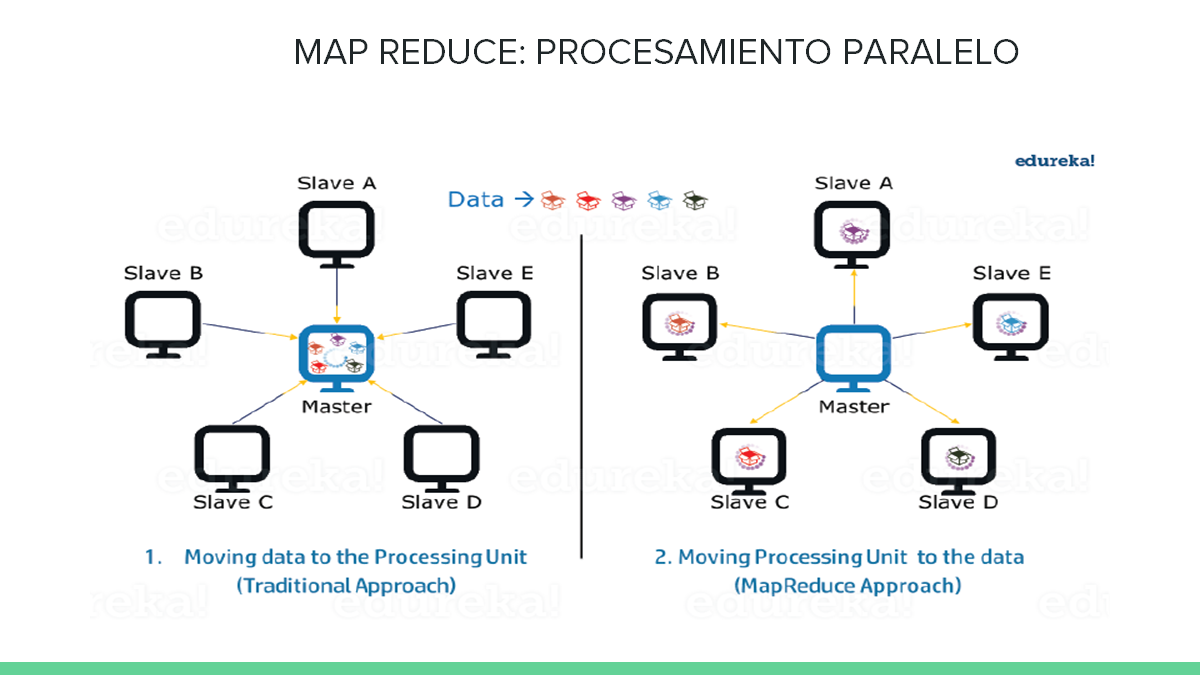

In [ ]:
# Muestra la cuarta imagen
display(Image('map4.png'))

In [ ]:
from multiprocessing import Pool
from collections import defaultdict

# Datos de entrada: cada nodo procesará una parte de estos textos
documentos = [
    "Big Data usa Hadoop y Spark",
    "MapReduce divide el procesamiento",
    "Cada nodo procesa una parte",
    "El maestro solo coordina",
    "Alta disponibilidad y escalabilidad"
]

# Fase MAP: cada nodo cuenta palabras en su fragmento
def map_function(texto):
    resultado = []
    for palabra in texto.split():
        resultado.append((palabra.lower(), 1))  # Emitimos (clave, valor)
    return resultado

# Fase SHUFFLE: agrupa las palabras iguales
def shuffle(mapped_data):
    grouped_data = defaultdict(list)
    for key, value in mapped_data:
        grouped_data[key].append(value)
    return grouped_data

# Fase REDUCE: suma los valores de cada palabra
def reduce_function(shuffled_data):
    reduced_data = {key: sum(values) for key, values in shuffled_data.items()}
    return reduced_data

# Ejecutamos Map en paralelo
with Pool() as pool:
    mapped_results = pool.map(map_function, documentos)

# Aplanamos los resultados intermedios
flattened_mapped = [pair for sublist in mapped_results for pair in sublist]

# Aplicamos Shuffle
shuffled_results = shuffle(flattened_mapped)

# Aplicamos Reduce
final_result = reduce_function(shuffled_results)

# Mostramos la distribución de carga y resultado final
print("\n--- Distribución de Carga de Trabajo ---")
for i, doc in enumerate(documentos):
    print(f"Nodo {i+1} procesó: {doc}")

print("\n--- Resultado Final de MapReduce ---")
for palabra, count in final_result.items():
    print(f"{palabra}: {count}")



--- Distribución de Carga de Trabajo ---
Nodo 1 procesó: Big Data usa Hadoop y Spark
Nodo 2 procesó: MapReduce divide el procesamiento
Nodo 3 procesó: Cada nodo procesa una parte
Nodo 4 procesó: El maestro solo coordina
Nodo 5 procesó: Alta disponibilidad y escalabilidad

--- Resultado Final de MapReduce ---
big: 1
data: 1
usa: 1
hadoop: 1
y: 2
spark: 1
mapreduce: 1
divide: 1
el: 2
procesamiento: 1
cada: 1
nodo: 1
procesa: 1
una: 1
parte: 1
maestro: 1
solo: 1
coordina: 1
alta: 1
disponibilidad: 1
escalabilidad: 1


In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>¿Qué es MongoDB y en qué se diferencia de otras bases de datos?</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    pre {
      background: #ecf0f1;
      padding: 10px;
      overflow: auto;
      border-radius: 4px;
      font-family: monospace;
      margin-bottom: 15px;
    }
    body.dark-mode pre {
      background: #34495e;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
  </style>
</head>
<body>
  <div class="container">
    <!-- Botón para alternar tema -->
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>¿Qué es MongoDB y en qué se diferencia de otras bases de datos?</h1>
      <p>
        <strong>MongoDB</strong> es una <strong>base de datos NoSQL orientada a documentos</strong>, diseñada para manejar <strong>grandes volúmenes de datos</strong> con alta escalabilidad y flexibilidad. A diferencia de las bases de datos <strong>relacionales (SQL)</strong>, MongoDB <strong>no almacena datos en tablas con filas y columnas</strong>, sino en documentos <strong>JSON/BSON</strong>, lo que permite almacenar datos en una estructura más dinámica.
      </p>
      <hr>
      <h2>Diferencias entre MongoDB y otras bases de datos</h2>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>MongoDB (NoSQL)</th>
            <th>MySQL/PostgreSQL (SQL)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Modelo de datos</strong></td>
            <td>Basado en documentos JSON/BSON</td>
            <td>Basado en tablas y filas</td>
          </tr>
          <tr>
            <td><strong>Esquema</strong></td>
            <td>Flexible (puede cambiar dinámicamente)</td>
            <td>Fijo (estructurado con relaciones)</td>
          </tr>
          <tr>
            <td><strong>Escalabilidad</strong></td>
            <td>Horizontal (Sharding y Replica Sets)</td>
            <td>Vertical (requiere servidores más potentes)</td>
          </tr>
          <tr>
            <td><strong>Transacciones</strong></td>
            <td>Soporta transacciones ACID desde v4.0, pero no como SQL</td>
            <td>Transacciones ACID completas</td>
          </tr>
          <tr>
            <td><strong>Consulta de datos</strong></td>
            <td>Lenguaje de consulta basado en JSON</td>
            <td>SQL (estructurado y con JOINs)</td>
          </tr>
          <tr>
            <td><strong>Velocidad en lectura/escritura</strong></td>
            <td>Más rápida en grandes volúmenes de datos no estructurados</td>
            <td>Mejor para consultas estructuradas y complejas</td>
          </tr>
        </tbody>
      </table>
      <p>
        MongoDB se usa en <strong>aplicaciones web, big data, IoT, e-commerce y análisis en tiempo real</strong>, mientras que <strong>MySQL y PostgreSQL</strong> son ideales para sistemas que requieren transacciones estrictas, como <strong>banca y ERP</strong>.
      </p>
      <hr>
      <h2>Explicación de la imagen: Arquitectura de MongoDB en un sistema distribuido</h2>
      <p>
        La imagen muestra la arquitectura de un <strong>clúster distribuido de MongoDB</strong>, diseñado para <strong>alta disponibilidad y escalabilidad</strong> mediante <strong>sharding y replica sets</strong>.
      </p>
      <p>
        <strong>Componentes principales en la imagen:</strong>
      </p>
      <ol>
        <li>
          <strong>Router (<code>mongos</code>)</strong><br>
          - Es el <strong>punto de entrada</strong> a la base de datos.<br>
          - Recibe las solicitudes de los clientes y las distribuye entre los shards.
        </li>
        <li>
          <strong>Config Server</strong><br>
          - Mantiene <strong>metadatos sobre la distribución de datos</strong> en los shards.<br>
          - Coordina la división y migración de datos entre shards.
        </li>
        <li>
          <strong>Shards (Sharding con Replica Sets)</strong><br>
          - Cada shard es un conjunto de réplicas (<strong>Replica Set</strong>) para alta disponibilidad.<br>
          - Dentro de cada shard hay múltiples instancias de <code>mongod</code> (servidores de bases de datos).<br>
          - Un shard puede manejar parte del dataset total (por ejemplo, usuarios de una región específica).
        </li>
      </ol>
      <hr>
      <h2>¿Cómo funciona este sistema distribuido?</h2>
      <ol>
        <li>
          <strong>El usuario realiza una consulta</strong> → Se envía al Router (<code>mongos</code>).
        </li>
        <li>
          <strong>El router consulta el Config Server</strong> → Para saber en qué shard están los datos.
        </li>
        <li>
          <strong>El Router distribuye la consulta</strong> → Al shard correcto, donde se ejecuta la operación.
        </li>
        <li>
          <strong>Cada shard replica los datos</strong> → Usando Replica Sets para tolerancia a fallos.
        </li>
      </ol>
      <hr>
      <h2>Ventajas de este modelo</h2>
      <ul>
        <li><strong>Escalabilidad horizontal infinita</strong> con sharding.</li>
        <li><strong>Alta disponibilidad</strong> mediante Replica Sets.</li>
        <li><strong>Tolerancia a fallos:</strong> Si un nodo falla, otro toma su lugar.</li>
      </ul>
      <hr>
      <h2>Conclusión</h2>
      <p>
        MongoDB es una <strong>base de datos NoSQL escalable y flexible</strong>, ideal para <strong>aplicaciones distribuidas</strong> que manejan grandes volúmenes de datos no estructurados. La imagen muestra cómo MongoDB maneja la escalabilidad y tolerancia a fallos mediante sharding y Replica Sets, asegurando que el sistema pueda crecer sin afectar el rendimiento.
      </p>
      <p>
        Para más detalles, puedes revisar la <strong>documentación oficial de MongoDB</strong> aquí:
        <a href="https://www.mongodb.com/docs/" target="_blank">Documentación de MongoDB</a>
      </p>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Característica,MongoDB (NoSQL),MySQL/PostgreSQL (SQL)
Modelo de datos,Basado en documentos JSON/BSON,Basado en tablas y filas
Esquema,Flexible (puede cambiar dinámicamente),Fijo (estructurado con relaciones)
Escalabilidad,Horizontal (Sharding y Replica Sets),Vertical (requiere servidores más potentes)
Transacciones,"Soporta transacciones ACID desde v4.0, pero no como SQL",Transacciones ACID completas
Consulta de datos,Lenguaje de consulta basado en JSON,SQL (estructurado y con JOINs)
Velocidad en lectura/escritura,Más rápida en grandes volúmenes de datos no estructurados,Mejor para consultas estructuradas y complejas


<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, HTML, Javascript

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>¿Qué es Redis y en qué se diferencia de otras bases de datos?</title>
  <!-- Carga asíncrona de MathJax (opcional) -->
  <script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
  </script>
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      background-color: #fefefe;
      color: #2c3e50;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1, h2, h3 {
      color: #2c3e50;
    }
    body.dark-mode h1,
    body.dark-mode h2,
    body.dark-mode h3 {
      color: #ecf0f1;
    }
    p, ul, ol {
      background: #ffffff;
      padding: 15px;
      border-left: 4px solid #3498db;
      margin-bottom: 15px;
    }
    body.dark-mode p,
    body.dark-mode ul,
    body.dark-mode ol {
      background: #34495e;
      border-left: 4px solid #2980b9;
    }
    pre {
      background: #ecf0f1;
      padding: 10px;
      overflow: auto;
      border-radius: 4px;
      font-family: monospace;
      margin-bottom: 15px;
    }
    body.dark-mode pre {
      background: #34495e;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 15px;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    /* Botón de enlace */
    .link-button {
      background-color: #2ecc71;
      color: white;
      border: none;
      padding: 10px 16px;
      border-radius: 4px;
      cursor: pointer;
      text-decoration: none;
      font-size: 1em;
      display: inline-block;
      margin-top: 20px;
      transition: background-color 0.3s;
    }
    .link-button:hover {
      background-color: #27ae60;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
      table, th, td { font-size: 0.9em; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
    /* Estilos de tabla */
    table {
      border-collapse: collapse;
      width: 100%;
      margin-bottom: 15px;
    }
    table, th, td {
      border: 1px solid #2c3e50;
      padding: 8px;
      text-align: left;
    }
    body.dark-mode table, body.dark-mode th, body.dark-mode td {
      border: 1px solid #ecf0f1;
    }
    th {
      background-color: #ecf0f1;
    }
    body.dark-mode th {
      background-color: #34495e;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <article>
      <h1>¿Qué es Redis y en qué se diferencia de otras bases de datos?</h1>
      <p>
        <strong>Redis</strong> (Remote Dictionary Server) es una <strong>base de datos en memoria de alto rendimiento</strong>, utilizada principalmente como <strong>cache, almacenamiento de sesiones, mensajería en tiempo real y procesamiento de datos en memoria</strong>. Redis es una <strong>base de datos NoSQL basada en clave-valor</strong>, lo que la hace extremadamente rápida.
      </p>
      <p>
        A diferencia de bases de datos como <strong>MongoDB</strong> o <strong>MySQL</strong>, Redis <strong>almacena datos en memoria</strong> en lugar de en disco, lo que la hace ideal para <strong>procesos que requieren respuestas en milisegundos</strong>.
      </p>
      <hr>
      <h2>Diferencias entre Redis y otras bases de datos</h2>
      <table>
        <thead>
          <tr>
            <th>Característica</th>
            <th>Redis (NoSQL en memoria)</th>
            <th>MongoDB (NoSQL basado en documentos)</th>
            <th>MySQL/PostgreSQL (SQL basado en tablas)</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td><strong>Modelo de datos</strong></td>
            <td>Clave-valor (Hash, Listas, Sets, Strings)</td>
            <td>JSON/BSON</td>
            <td>Relacional (Tablas y filas)</td>
          </tr>
          <tr>
            <td><strong>Velocidad</strong></td>
            <td>Extremadamente rápida (100,000+ req/s)</td>
            <td>Alta pero depende del disco</td>
            <td>Más lenta que Redis por almacenamiento en disco</td>
          </tr>
          <tr>
            <td><strong>Persistencia</strong></td>
            <td>Opcional (SnapShot y Append-Only File)</td>
            <td>Sí, almacenado en disco</td>
            <td>Sí, almacenado en disco</td>
          </tr>
          <tr>
            <td><strong>Transacciones ACID</strong></td>
            <td>No completamente</td>
            <td>Parcialmente</td>
            <td>Sí</td>
          </tr>
          <tr>
            <td><strong>Escalabilidad</strong></td>
            <td>Horizontal con Sharding y Cluster</td>
            <td>Horizontal con Sharding y Replica Sets</td>
            <td>Vertical (depende del hardware)</td>
          </tr>
        </tbody>
      </table>
      <p>
        Redis se usa principalmente para <strong>caching, sesiones y procesamiento en tiempo real</strong>, mientras que <strong>MongoDB</strong> y <strong>MySQL</strong> son mejores para almacenamiento a largo plazo.
      </p>
      <hr>
      <h2>Explicación de la imagen: Arquitectura de Redis en un sistema distribuido</h2>
      <p>
        La imagen muestra la arquitectura de un <strong>clúster de Redis distribuido</strong>, que combina <strong>sharding, replicación y monitoreo automático</strong>.
      </p>
      <p>
        <strong>Componentes principales en la imagen:</strong>
      </p>
      <ol>
        <li>
          <strong>Redis Client:</strong><br>
          - Es la aplicación que interactúa con Redis para leer y escribir datos.<br>
          - Envía las solicitudes a <strong>TwemProxy</strong>, que decide a qué shard enviarlas.
        </li>
        <li>
          <strong>TwemProxy (o Nutcracker):</strong><br>
          - Un proxy que ayuda a balancear la carga y distribuir las peticiones a los shards correctos.<br>
          - Oculta la complejidad del sharding al cliente.
        </li>
        <li>
          <strong>Redis Shards (Sharding y Replicación):</strong><br>
          - Cada shard contiene un Redis Master y varios Slaves.<br>
          - El Master maneja escrituras y sincroniza a los esclavos.
        </li>
        <li>
          <strong>Redis Sentinel:</strong><br>
          - Monitorea la salud de los nodos Redis.<br>
          - Promueve automáticamente a un Slave a Master si el Master falla, garantizando alta disponibilidad.
        </li>
      </ol>
      <hr>
      <h2>¿Cómo funciona este sistema distribuido?</h2>
      <ol>
        <li><strong>El cliente envía una solicitud:</strong> se envía al proxy TwemProxy.</li>
        <li><strong>TwemProxy redirige la petición:</strong> al shard correspondiente.</li>
        <li><strong>Redis procesa la petición:</strong> Lecturas pueden hacerse desde un Slave; escrituras se envían al Master.</li>
        <li><strong>Redis Sentinel monitorea el clúster:</strong> Si un Master falla, un Slave lo reemplaza automáticamente.</li>
      </ol>
      <hr>
      <h2>Ventajas de este modelo</h2>
      <ul>
        <li><strong>Alta velocidad:</strong> Redis responde en milisegundos.</li>
        <li><strong>Alta disponibilidad:</strong> Sentinel permite que el sistema siga funcionando incluso si un nodo falla.</li>
        <li><strong>Escalabilidad horizontal:</strong> Se pueden agregar más shards según sea necesario.</li>
      </ul>
      <hr>
      <h2>Conclusión</h2>
      <p>
        Redis es una <strong>base de datos en memoria extremadamente rápida</strong>, ideal para <strong>caching, almacenamiento de sesiones, colas de mensajes y análisis en tiempo real</strong>. La imagen muestra cómo Redis usa sharding y replicación para mejorar su rendimiento y disponibilidad, asegurando que los datos sean accesibles rápidamente y sin fallos.
      </p>
      <p>
        Para más detalles, consulta la documentación oficial de Redis:
      </p>
      <a class="link-button" href="https://redis.io/docs/" target="_blank">Documentación de Redis</a>
    </article>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
display(Javascript("MathJax.Hub.Queue(['Typeset', MathJax.Hub]);"))


Característica,Redis (NoSQL en memoria),MongoDB (NoSQL basado en documentos),MySQL/PostgreSQL (SQL basado en tablas)
Modelo de datos,"Clave-valor (Hash, Listas, Sets, Strings)",JSON/BSON,Relacional (Tablas y filas)
Velocidad,"Extremadamente rápida (100,000+ req/s)",Alta pero depende del disco,Más lenta que Redis por almacenamiento en disco
Persistencia,Opcional (SnapShot y Append-Only File),"Sí, almacenado en disco","Sí, almacenado en disco"
Transacciones ACID,No completamente,Parcialmente,Sí
Escalabilidad,Horizontal con Sharding y Cluster,Horizontal con Sharding y Replica Sets,Vertical (depende del hardware)


<IPython.core.display.Javascript object>

In [10]:
from IPython.display import display, HTML
import re

html_content = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Cuestionario - 15 Preguntas y Respuestas sobre Sharding, Teorema CAP y Cassandra</title>
  <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap" rel="stylesheet">
  <style>
    /* Contenedor centralizado */
    .container {
      max-width: 900px;
      margin: 0 auto;
      padding: 20px;
    }
    body {
      font-family: 'Roboto', Arial, sans-serif;
      line-height: 1.8;
      background-color: #f9f9f9;
      color: #333;
      padding: 20px;
      transition: background-color 0.3s, color 0.3s;
    }
    /* Modo oscuro */
    body.dark-mode {
      background-color: #2c3e50;
      color: #ecf0f1;
    }
    h1 {
      text-align: center;
      font-size: 2.5em;
      margin-bottom: 20px;
      color: #2c3e50;
    }
    body.dark-mode h1 {
      color: #ecf0f1;
    }
    h2 {
      color: #2980b9;
      font-size: 1.8em;
      margin-top: 30px;
    }
    body.dark-mode h2 {
      color: #9ad3de;
    }
    h3 {
      margin-top: 25px;
      font-size: 1.5em;
    }
    p {
      font-size: 1.2em;
      margin-bottom: 15px;
    }
    ul {
      list-style-type: square;
      margin-left: 30px;
      margin-bottom: 20px;
    }
    ul ul {
      list-style-type: disc;
      margin-left: 50px;
    }
    li {
      margin-bottom: 10px;
      font-size: 1.1em;
    }
    hr {
      border: none;
      border-top: 1px solid #ccc;
      margin: 20px 0;
    }
    /* Botón para cambiar tema */
    .theme-toggle {
      background-color: #3498db;
      color: white;
      border: none;
      padding: 8px 12px;
      border-radius: 4px;
      cursor: pointer;
      margin-bottom: 20px;
      display: block;
      margin-left: auto;
      margin-right: auto;
      transition: background-color 0.3s;
    }
    .theme-toggle:hover {
      background-color: #2980b9;
    }
    @media (max-width: 600px) {
      body { padding: 10px; }
      p, ul, ol { padding: 10px; }
    }
    /* Resalta palabras clave */
    .keyword {
      color: #e74c3c;
      font-weight: bold;
    }
  </style>
</head>
<body>
  <div class="container">
    <button class="theme-toggle" onclick="toggleTheme()">Cambiar Tema</button>
    <h1>Cuestionario - 15 Preguntas y Respuestas sobre Sharding, Teorema CAP y Cassandra</h1>

    <!-- Sección 1: Sharding -->
    <h3>- Sección 1: Sharding</h3>
    <ol>
      <li>
        <strong>¿Qué es sharding y por qué se usa en bases de datos distribuidas?</strong><br>
        <strong>Respuesta:</strong> Sharding es una técnica de particionamiento de bases de datos en la que los datos se dividen en múltiples fragmentos llamados “shards”. Se utiliza para mejorar el rendimiento, la escalabilidad y la disponibilidad al distribuir la carga entre varios servidores.
      </li>
      <li>
        <strong>¿Cuál es la diferencia entre un shard físico y un shard lógico?</strong><br>
        <strong>Respuesta:</strong><br>
        - <strong>Shard físico:</strong> Representa una instancia real de almacenamiento en un servidor o nodo.<br>
        - <strong>Shard lógico:</strong> Es una partición virtual de los datos que puede moverse entre diferentes shards físicos sin afectar la aplicación.
      </li>
      <li>
        <strong>¿Cuáles son los principales problemas del hashing tradicional en sharding?</strong><br>
        <strong>Respuesta:</strong><br>
        - Falta de estabilidad en la asignación de datos.<br>
        - Si se agregan o eliminan shards, se debe redistribuir la mayoría de los datos, lo que genera una gran carga en la red.<br>
        - Puede causar desbalance en la carga entre shards.
      </li>
      <li>
        <strong>¿Cómo soluciona el sharding consistente estos problemas?</strong><br>
        <strong>Respuesta:</strong> El sharding consistente utiliza un anillo hash, donde los shards y los datos se asignan a puntos específicos en un espacio de clave hash. Cuando se agregan o eliminan shards, solo una fracción de los datos se redistribuye, lo que reduce la sobrecarga en la red.
      </li>
      <li>
        <strong>¿Cuáles son las estrategias comunes de sharding en bases de datos modernas?</strong><br>
        <strong>Respuesta:</strong><br>
        - Sharding por rango: Divide los datos en función de un valor ordenado (ej., IDs de usuario).<br>
        - Sharding por hash: Aplica una función hash a la clave para distribuir los datos uniformemente.<br>
        - Sharding geográfico: Asigna shards según la ubicación de los datos o de los usuarios.
      </li>
    </ol>

    <hr>

    <!-- Sección 2: Teorema CAP -->
    <h3>- Sección 2: Teorema CAP</h3>
    <ol start="6">
      <li>
        <strong>¿Qué establece el Teorema CAP en bases de datos distribuidas?</strong><br>
        <strong>Respuesta:</strong> El Teorema CAP dice que en un sistema distribuido solo se pueden garantizar dos de las tres propiedades siguientes al mismo tiempo:<br>
        - <strong>C (Consistencia):</strong> Todos los nodos ven los mismos datos en todo momento.<br>
        - <strong>A (Disponibilidad):</strong> Todas las solicitudes reciben una respuesta, incluso si algunos nodos fallan.<br>
        - <strong>P (Tolerancia a particiones):</strong> El sistema sigue funcionando incluso si hay fallos en la comunicación entre nodos.
      </li>
      <li>
        <strong>¿Qué tipo de sistemas priorizan Consistencia y Tolerancia a Particiones (CP)?</strong><br>
        <strong>Respuesta:</strong> Bases de datos como MongoDB, HBase y Redis priorizan la consistencia y la tolerancia a particiones, sacrificando disponibilidad cuando hay fallos de red para mantener los datos consistentes.
      </li>
      <li>
        <strong>¿Qué tipo de sistemas priorizan Disponibilidad y Tolerancia a Particiones (AP)?</strong><br>
        <strong>Respuesta:</strong> Bases de datos como Cassandra, DynamoDB y CouchDB, donde la prioridad es seguir operando ante fallos sin garantizar una consistencia inmediata.
      </li>
      <li>
        <strong>¿Por qué los bancos priorizan Consistencia y Disponibilidad (CA) sobre Tolerancia a Particiones?</strong><br>
        <strong>Respuesta:</strong> En los sistemas financieros, la integridad de los datos es esencial, por lo que es más importante garantizar una fuerte consistencia y disponibilidad (por ejemplo, para evitar saldos bancarios inconsistentes). Si bien puede haber riesgos durante una partición de red, la fiabilidad de los datos y el servicio resulta prioritaria.
      </li>
      <li>
        <strong>¿Cómo afecta el Teorema CAP a Bitcoin y a las redes sociales?</strong><br>
        <strong>Respuesta:</strong><br>
        - Bitcoin: Prioriza Disponibilidad y Tolerancia a Particiones, ya que la blockchain debe seguir funcionando incluso con nodos desconectados o problemas de red.<br>
        - Redes Sociales: Priorizan Disponibilidad y una consistencia eventual, pues se puede tolerar cierto retraso antes de que un cambio se refleje en todos los servidores.
      </li>
    </ol>

    <hr>

    <!-- Sección 3: Cassandra y Bases de Datos Distribuidas -->
    <h3>- Sección 3: Cassandra y Bases de Datos Distribuidas</h3>
    <ol start="11">
      <li>
        <strong>¿Cómo maneja Cassandra la consistencia en un entorno distribuido?</strong><br>
        <strong>Respuesta:</strong> Cassandra utiliza un enfoque de consistencia eventual, lo que significa que los datos pueden estar temporalmente desincronizados, pero con el tiempo convergen a un estado consistente en todos los nodos.
      </li>
      <li>
        <strong>¿Qué es el protocolo Gossip en Cassandra?</strong><br>
        <strong>Respuesta:</strong> Gossip es un protocolo de comunicación peer-to-peer que permite a los nodos intercambiar información sobre el estado del clúster sin necesidad de un nodo centralizado.
      </li>
      <li>
        <strong>¿Cómo funciona la replicación en Cassandra?</strong><br>
        <strong>Respuesta:</strong> Cassandra distribuye múltiples copias de los datos en diferentes nodos para garantizar alta disponibilidad y tolerancia a fallos. El factor de replicación (RF) indica cuántas copias de los datos se almacenan.
      </li>
      <li>
        <strong>¿Cuál es la diferencia entre sharding y replicación?</strong><br>
        <strong>Respuesta:</strong><br>
        - <strong>Sharding:</strong> Divide los datos en partes independientes que se distribuyen entre diversos nodos.<br>
        - <strong>Replicación:</strong> Crea copias idénticas de los mismos datos en distintos nodos para aumentar la disponibilidad y la redundancia.
      </li>
      <li>
        <strong>¿Qué ventaja tiene Cassandra sobre otras bases de datos distribuidas?</strong><br>
        <strong>Respuesta:</strong> Cassandra está diseñada para ofrecer alta escalabilidad y tolerancia a fallos sin sacrificar el rendimiento, lo que permite manejar grandes volúmenes de datos en múltiples regiones con baja latencia.
      </li>
    </ol>

    <hr>
  </div>
  <script>
    function toggleTheme() {
      document.body.classList.toggle("dark-mode");
    }
  </script>
</body>
</html>
"""

display(HTML(html_content))
